# A journey on Crypto Assets landscape

This is a journey to understand the Crypto Asset landscape. All cryptocurrency data is pulled via api from CryptoCompare (https://www.cryptocompare.com/)

API documentation: https://min-api.cryptocompare.com/documentation
github: https://github.com/CryptoCompareLTD/api-guides/tree/master/python

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.palettes import Category20
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral
from bokeh.palettes import Turbo256
from bokeh.palettes import Viridis256
from bokeh.models import Legend

### 1 - Getting to know crypto assets in the market and its related data

<font color='green'>All the Coins</font><br><font color='blue'> - Returns all the coins that CryptoCompare has added to the website. This is not the full list of coins we have in the system, it is just the list of coins we have done some research on.</font>

In [2]:
url = "https://min-api.cryptocompare.com/data/all/coinlist"

result = requests.get(url)

result.status_code # to check if it is a successful get, 200 means ok

200

In [3]:
data = result.json()
data

{'Response': 'Success',
 'Message': 'Coin list succesfully returned!',
 'Data': {'42': {'Id': '4321',
   'Url': '/coins/42/overview',
   'ImageUrl': '/media/35650717/42.jpg',
   'ContentCreatedOn': 1427211129,
   'Name': '42',
   'Symbol': '42',
   'CoinName': '42 Coin',
   'FullName': '42 Coin (42)',
   'Description': 'Everything about 42 coin is 42 - apart from the transaction fees and difficulty retargetting - 0.00000001 and 7.5mins. A scrypt coin with 42 coins max, a 42 second block time, with superblocks giving 10 times the standard block reward of 0.0000420 42&#39;s.42 coin is a cryptocurrency with completed emission, fair distribution (no ICO, premine or instamine) and both private and public transaction support. The maximum supply of 42 coins makes the remaining 41.99 extremely rare. The innovative deflationary model provides a constant rise in incentives both for miners and long term investors. 42-coin delivers a hybrid of Proof-of-Work and Proof-of-Stake transaction confirmat

In [4]:
data.keys()

dict_keys(['Response', 'Message', 'Data', 'RateLimit', 'HasWarning', 'Type'])

In [5]:
data['Data'] # only 'Data' key is of interest

{'42': {'Id': '4321',
  'Url': '/coins/42/overview',
  'ImageUrl': '/media/35650717/42.jpg',
  'ContentCreatedOn': 1427211129,
  'Name': '42',
  'Symbol': '42',
  'CoinName': '42 Coin',
  'FullName': '42 Coin (42)',
  'Description': 'Everything about 42 coin is 42 - apart from the transaction fees and difficulty retargetting - 0.00000001 and 7.5mins. A scrypt coin with 42 coins max, a 42 second block time, with superblocks giving 10 times the standard block reward of 0.0000420 42&#39;s.42 coin is a cryptocurrency with completed emission, fair distribution (no ICO, premine or instamine) and both private and public transaction support. The maximum supply of 42 coins makes the remaining 41.99 extremely rare. The innovative deflationary model provides a constant rise in incentives both for miners and long term investors. 42-coin delivers a hybrid of Proof-of-Work and Proof-of-Stake transaction confirmation methods and represents a new way of securing the network against 51% attacks.',
  'A

In [6]:
df_coin = pd.DataFrame(data['Data'])

df_coin
#df_coin.to_excel('rawdata.xlsx')

42  \
Id                                                                 4321   
Url                                                  /coins/42/overview   
ImageUrl                                         /media/35650717/42.jpg   
ContentCreatedOn                                             1427211129   
Name                                                                 42   
Symbol                                                               42   
CoinName                                                        42 Coin   
FullName                                                   42 Coin (42)   
Description           Everything about 42 coin is 42 - apart from th...   
AssetTokenStatus                                                    N/A   
Algorithm                                                        Scrypt   
ProofType                                                       PoW/PoS   
SortOrder                                                            34   
Sponsored                                                         False   
Taxonomy              {'Access': '', 'FCA': '', 'FINMA': '', 'Indust...   
Rating                {'Weiss': {'Rating': '', 'TechnologyAdoptionRa...   
IsTrading                                                          True   
TotalCoinsMined                                                       0   
CirculatingSupply                                                     0   
BlockNumber                                                           0   
NetHashesPerSecond                                                    0   
BlockReward                                                           0   
BlockTime                                                             0   
AssetLaunchDate                                              0000-00-00   
AssetWhitepaperUrl                                                        
AssetWebsiteUrl                                    https://42-coin.org/   
MaxSupply                                                             0   
MktCapPenalty                                                         0   
IsUsedInDefi                                                          0   
IsUsedInNft                                                           0   
PlatformType                                                        NaN   
BuiltOn                                                             NaN   
SmartContractAddress                                                NaN   
DecimalPoints                                                       NaN   
Difficulty                                                          NaN   
AlgorithmType                                                       NaN   

                                                                    300  \
Id                                                               749869   
Url                                                 /coins/300/overview   
ImageUrl                                        /media/27010595/300.png   
ContentCreatedOn                                             1517935016   
Name                                                                300   
Symbol                                                              300   
CoinName                                                      300 token   
FullName                                                300 token (300)   
Description           300 token is an ERC20 token. This Token was cr...   
AssetTokenStatus                                                    N/A   
Algorithm                                                           N/A   
ProofType                                                           N/A   
SortOrder                                                          2212   
Sponsored                                                         False   
Taxonomy              {'Access': '', 'FCA': '', 'FINMA': '', 'Indust...   
Rating                {'Weiss': {'Rating': '', 'TechnologyAdoptionRa...   
IsTrading         

In [7]:
df_coin[df_coin.columns[df_coin.isna().any()]]

42  \
Id                                                                 4321   
Url                                                  /coins/42/overview   
ImageUrl                                         /media/35650717/42.jpg   
ContentCreatedOn                                             1427211129   
Name                                                                 42   
Symbol                                                               42   
CoinName                                                        42 Coin   
FullName                                                   42 Coin (42)   
Description           Everything about 42 coin is 42 - apart from th...   
AssetTokenStatus                                                    N/A   
Algorithm                                                        Scrypt   
ProofType                                                       PoW/PoS   
SortOrder                                                            34   
Sponsored                                                         False   
Taxonomy              {'Access': '', 'FCA': '', 'FINMA': '', 'Indust...   
Rating                {'Weiss': {'Rating': '', 'TechnologyAdoptionRa...   
IsTrading                                                          True   
TotalCoinsMined                                                       0   
CirculatingSupply                                                     0   
BlockNumber                                                           0   
NetHashesPerSecond                                                    0   
BlockReward                                                           0   
BlockTime                                                             0   
AssetLaunchDate                                              0000-00-00   
AssetWhitepaperUrl                                                        
AssetWebsiteUrl                                    https://42-coin.org/   
MaxSupply                                                             0   
MktCapPenalty                                                         0   
IsUsedInDefi                                                          0   
IsUsedInNft                                                           0   
PlatformType                                                        NaN   
BuiltOn                                                             NaN   
SmartContractAddress                                                NaN   
DecimalPoints                                                       NaN   
Difficulty                                                          NaN   
AlgorithmType                                                       NaN   

                                                                    300  \
Id                                                               749869   
Url                                                 /coins/300/overview   
ImageUrl                                        /media/27010595/300.png   
ContentCreatedOn                                             1517935016   
Name                                                                300   
Symbol                                                              300   
CoinName                                                      300 token   
FullName                                                300 token (300)   
Description           300 token is an ERC20 token. This Token was cr...   
AssetTokenStatus                                                    N/A   
Algorithm                                                           N/A   
ProofType                                                           N/A   
SortOrder                                                          2212   
Sponsored                                                         False   
Taxonomy              {'Access': '', 'FCA': '', 'FINMA': '', 'Indust...   
Rating                {'Weiss': {'Rating': '', 'TechnologyAdoptionRa...   
IsTrading         

Result shows that every row or column has null values

There are 7322 cryptocurrencies pulled from this platform on Nov 17th 2021, there could be more in reality. In fact, Statista (https://www.statista.com/statistics/863917/number-crypto-coins-tokens listed 7,557 on its website on Nov 16th 2021.<br>Throughout the course of my 1 week analysis, the list keeps increasing

In [8]:
df_coin = df_coin.transpose() # too many columns, tranpose it for ease of analysis

In [9]:
df_coin

Id                       Url                         ImageUrl  \
42          4321        /coins/42/overview           /media/35650717/42.jpg   
300       749869       /coins/300/overview          /media/27010595/300.png   
365        33639       /coins/365/overview            /media/352070/365.png   
404        21227       /coins/404/overview  /media/35650851/404-300x300.jpg   
433       926547       /coins/433/overview          /media/34836095/433.png   
...          ...                       ...                              ...   
NASADOGE  944611  /coins/nasadoge/overview     /media/38554200/nasadoge.png   
FAST      944613      /coins/fast/overview         /media/38554203/fast.png   
ATH       912943       /coins/ath/overview          /media/34155545/ath.jpg   
TIKI      944619      /coins/tiki/overview         /media/38554206/tiki.png   
PARAB     944622     /coins/parab/overview         /media/38554208/para.png   

         ContentCreatedOn      Name    Symbol    CoinName  \
42             1427211129        42        42     42 Coin   
300            1517935016       300       300   300 token   
365            1480032918       365       365     365Coin   
404            1466100361       404       404     404Coin   
433            1541597321       433       433   433 Token   
...                   ...       ...       ...         ...   
NASADOGE       1637072743  NASADOGE  NASADOGE   Nasa Doge   
FAST           1637075636      FAST      FAST    Fastswap   
ATH            1530529078       ATH       ATH     Atheios   
TIKI           1637079218      TIKI      TIKI  Tiki Token   
PARAB          1637080420     PARAB     PARAB   Parabolic   

                      FullName  \
42                42 Coin (42)   
300            300 token (300)   
365              365Coin (365)   
404              404Coin (404)   
433            433 Token (433)   
...                        ...   
NASADOGE  Nasa Doge (NASADOGE)   
FAST           Fastswap (FAST)   
ATH              Atheios (ATH)   
TIKI         Tiki Token (TIKI)   
PARAB        Parabolic (PARAB)   

                                                Description AssetTokenStatus  \
42        Everything about 42 coin is 42 - apart from th...              N/A   
300       300 token is an ERC20 token. This Token was cr...              N/A   
365       365Coin is a Proof of Work and Proof of Stake ...              N/A   
404       404 is a PoW/PoS hybrid cryptocurrency that al...              N/A   
433       433 Token is a decentralised soccer platform t...         Finished   
...                                                     ...              ...   
NASADOGE  NasaDoge prevents being a ponzi with paulownia...              N/A   
FAST      FastSwap is a decentralized protocol for autom...              N/A   
ATH       Atheios is a PoW-based payment platform. It en...              N/A   
TIKI      A BNB reflection token with auto-claim feature...              N/A   
PARAB     Parabolic Token has been designed to achieve a...              N/A   

          ... MaxSupply MktCapPenalty IsUsedInDefi IsUsedInNft PlatformType  \
42        ...         0             0            0           0          NaN   
300       ...       300             0            0           0        token   
365       ...         0             0            0           0          NaN   
404       ...         0             0            0           0          NaN   
433       ...       NaN           NaN          NaN         NaN          NaN   
...       ...       ...           ...          ...         ...          ...   
NASADOGE  ...        -1             0            0           0        token   
FAST      ...        -1             0            1           0        token   
ATH       ...       NaN           NaN          NaN         NaN          NaN   
TIKI      ...        -1             0            0           0        token   
PARAB     ...        -1             0            0           0        token   

         Buil

In [10]:
df_coin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7322 entries, 42 to PARAB
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    7322 non-null   object
 1   Url                   7322 non-null   object
 2   ImageUrl              7320 non-null   object
 3   ContentCreatedOn      7322 non-null   object
 4   Name                  7322 non-null   object
 5   Symbol                7322 non-null   object
 6   CoinName              7322 non-null   object
 7   FullName              7322 non-null   object
 8   Description           7322 non-null   object
 9   AssetTokenStatus      7322 non-null   object
 10  Algorithm             7322 non-null   object
 11  ProofType             7322 non-null   object
 12  SortOrder             7322 non-null   object
 13  Sponsored             7322 non-null   object
 14  Taxonomy              7322 non-null   object
 15  Rating                7322 non-null   obj

In [11]:
# find duplicate rows based on 'Name'
duplicate_rows = df_coin[df_coin.duplicated(subset=['Name'], keep = False)]
#duplicate_rows.to_excel('duplicate.xlsx')
duplicate_rows.head()

Empty DataFrame
Columns: [Id, Url, ImageUrl, ContentCreatedOn, Name, Symbol, CoinName, FullName, Description, AssetTokenStatus, Algorithm, ProofType, SortOrder, Sponsored, Taxonomy, Rating, IsTrading, TotalCoinsMined, CirculatingSupply, BlockNumber, NetHashesPerSecond, BlockReward, BlockTime, AssetLaunchDate, AssetWhitepaperUrl, AssetWebsiteUrl, MaxSupply, MktCapPenalty, IsUsedInDefi, IsUsedInNft, PlatformType, BuiltOn, SmartContractAddress, DecimalPoints, Difficulty, AlgorithmType]
Index: []

[0 rows x 36 columns]

In [12]:
# find duplicate rows based on 'Id'
duplicate_rows = df_coin[df_coin.duplicated(subset=['Id'], keep = False)]
#duplicate_rows.to_excel('duplicate.xlsx')
duplicate_rows.head()

Empty DataFrame
Columns: [Id, Url, ImageUrl, ContentCreatedOn, Name, Symbol, CoinName, FullName, Description, AssetTokenStatus, Algorithm, ProofType, SortOrder, Sponsored, Taxonomy, Rating, IsTrading, TotalCoinsMined, CirculatingSupply, BlockNumber, NetHashesPerSecond, BlockReward, BlockTime, AssetLaunchDate, AssetWhitepaperUrl, AssetWebsiteUrl, MaxSupply, MktCapPenalty, IsUsedInDefi, IsUsedInNft, PlatformType, BuiltOn, SmartContractAddress, DecimalPoints, Difficulty, AlgorithmType]
Index: []

[0 rows x 36 columns]

In [13]:
# find duplicate rows based on 'Symbol'
duplicate_rows = df_coin[df_coin.duplicated(subset=['Symbol'], keep = False)]
#duplicate_rows.to_excel('duplicate.xlsx')
duplicate_rows.head()

Empty DataFrame
Columns: [Id, Url, ImageUrl, ContentCreatedOn, Name, Symbol, CoinName, FullName, Description, AssetTokenStatus, Algorithm, ProofType, SortOrder, Sponsored, Taxonomy, Rating, IsTrading, TotalCoinsMined, CirculatingSupply, BlockNumber, NetHashesPerSecond, BlockReward, BlockTime, AssetLaunchDate, AssetWhitepaperUrl, AssetWebsiteUrl, MaxSupply, MktCapPenalty, IsUsedInDefi, IsUsedInNft, PlatformType, BuiltOn, SmartContractAddress, DecimalPoints, Difficulty, AlgorithmType]
Index: []

[0 rows x 36 columns]

In [14]:
df_coin.duplicated('Symbol').value_counts() # just to confirm

False    7322
dtype: int64

In [15]:
# find duplicate rows based on 'CoinName'
duplicate_rows = df_coin[df_coin.duplicated(subset=['CoinName'], keep = False)]
#duplicate_rows.to_excel('duplicate.xlsx')
duplicate_rows.head()

Id                    Url                ImageUrl ContentCreatedOn  \
XPY    5030    /coins/xpy/overview  /media/20076/xpy_1.png       1428671950   
AEGIS  4326  /coins/aegis/overview    /media/19595/ags.png       1427212940   
COMM   4422   /coins/comm/overview   /media/19661/comm.png       1427711603   
PYC    4591    /coins/pyc/overview    /media/19878/pyc.png       1428491846   
RYC    4596    /coins/ryc/overview    /media/19898/ryc.png       1428491905   

        Name Symbol        CoinName               FullName  \
XPY      XPY    XPY         PayCoin          PayCoin (XPY)   
AEGIS  AEGIS  AEGIS           Aegis          Aegis (AEGIS)   
COMM    COMM   COMM  Community Coin  Community Coin (COMM)   
PYC      PYC    PYC         PayCoin          PayCoin (PYC)   
RYC      RYC    RYC       RoyalCoin        RoyalCoin (RYC)   

                                             Description AssetTokenStatus  \
XPY    Paycoin is an SHA256 cryptocurrency that switc...              N/A   
AEGIS  Aegis (AGS) is an X15 altcoin with a block tim...              N/A   
COMM   Community Coin is a fully premined coin with a...              N/A   
PYC    PayCoin is a peer-to-peer (P2P) Internet curre...              N/A   
RYC    RoyalCoin is a new scrypt based coin created b...              N/A   

       ... MaxSupply MktCapPenalty IsUsedInDefi IsUsedInNft PlatformType  \
XPY    ...       NaN           NaN          NaN         NaN          NaN   
AEGIS  ...       NaN           NaN          NaN         NaN          NaN   
COMM   ...       NaN           NaN          NaN         NaN          NaN   
PYC    ...       NaN           NaN          NaN         NaN          NaN   
RYC    ...       NaN           NaN          NaN         NaN          NaN   

      BuiltOn SmartContractAddress DecimalPoints Difficulty AlgorithmType  
XPY       NaN                  NaN           NaN        NaN           NaN  
AEGIS     NaN                  NaN           NaN        NaN           NaN  
COMM      NaN                  NaN           NaN        NaN           NaN  
PYC       NaN                  NaN           NaN        NaN           NaN  
RYC       NaN                  NaN           NaN        NaN           NaN  

[5 rows x 36 columns]

In [16]:
df_coin.duplicated('CoinName').value_counts() # just to confirm

False    7269
True       53
dtype: int64

There seems to be duplicate rows based on 'CoinName' but upon further checking, they are different as can be seen based on 'Symbol'

In [17]:
# convert 'ContentCreatedOn' to datetime format
df_coin['DateCreated'] = pd.to_datetime(df_coin['ContentCreatedOn'], unit='s')
df_coin

#df_coin.to_excel("datatransposed.xlsx")

Id                       Url                         ImageUrl  \
42          4321        /coins/42/overview           /media/35650717/42.jpg   
300       749869       /coins/300/overview          /media/27010595/300.png   
365        33639       /coins/365/overview            /media/352070/365.png   
404        21227       /coins/404/overview  /media/35650851/404-300x300.jpg   
433       926547       /coins/433/overview          /media/34836095/433.png   
...          ...                       ...                              ...   
NASADOGE  944611  /coins/nasadoge/overview     /media/38554200/nasadoge.png   
FAST      944613      /coins/fast/overview         /media/38554203/fast.png   
ATH       912943       /coins/ath/overview          /media/34155545/ath.jpg   
TIKI      944619      /coins/tiki/overview         /media/38554206/tiki.png   
PARAB     944622     /coins/parab/overview         /media/38554208/para.png   

         ContentCreatedOn      Name    Symbol    CoinName  \
42             1427211129        42        42     42 Coin   
300            1517935016       300       300   300 token   
365            1480032918       365       365     365Coin   
404            1466100361       404       404     404Coin   
433            1541597321       433       433   433 Token   
...                   ...       ...       ...         ...   
NASADOGE       1637072743  NASADOGE  NASADOGE   Nasa Doge   
FAST           1637075636      FAST      FAST    Fastswap   
ATH            1530529078       ATH       ATH     Atheios   
TIKI           1637079218      TIKI      TIKI  Tiki Token   
PARAB          1637080420     PARAB     PARAB   Parabolic   

                      FullName  \
42                42 Coin (42)   
300            300 token (300)   
365              365Coin (365)   
404              404Coin (404)   
433            433 Token (433)   
...                        ...   
NASADOGE  Nasa Doge (NASADOGE)   
FAST           Fastswap (FAST)   
ATH              Atheios (ATH)   
TIKI         Tiki Token (TIKI)   
PARAB        Parabolic (PARAB)   

                                                Description AssetTokenStatus  \
42        Everything about 42 coin is 42 - apart from th...              N/A   
300       300 token is an ERC20 token. This Token was cr...              N/A   
365       365Coin is a Proof of Work and Proof of Stake ...              N/A   
404       404 is a PoW/PoS hybrid cryptocurrency that al...              N/A   
433       433 Token is a decentralised soccer platform t...         Finished   
...                                                     ...              ...   
NASADOGE  NasaDoge prevents being a ponzi with paulownia...              N/A   
FAST      FastSwap is a decentralized protocol for autom...              N/A   
ATH       Atheios is a PoW-based payment platform. It en...              N/A   
TIKI      A BNB reflection token with auto-claim feature...              N/A   
PARAB     Parabolic Token has been designed to achieve a...              N/A   

          ... MktCapPenalty IsUsedInDefi IsUsedInNft PlatformType BuiltOn  \
42        ...             0            0           0          NaN     NaN   
300       ...             0            0           0        token     ETH   
365       ...             0            0           0          NaN     NaN   
404       ...             0            0           0          NaN     NaN   
433       ...           NaN          NaN         NaN          NaN     NaN   
...       ...           ...          ...         ...          ...     ...   
NASADOGE  ...             0            0           0        token     BNB   
FAST      ...             0            1           0        token     BNB   
ATH       ...           NaN          NaN         NaN          NaN     NaN   
TIKI      ...             0            0           0        token     BNB   
PARAB     ...             0            0           0        token     BNB   

                                Smart

Remove unneccessary and duplicate columns

In [18]:
comparison_column = np.where(df_coin["Name"] == df_coin["Symbol"], True, False)
#np.sum(comparison_column)
#[comparison_column].count()
#df["equal"] = comparison_column
#print(df)
type(comparison_column)
np.count_nonzero(comparison_column == False)

20

In [19]:
df_coin['Name'].compare(df_coin['Symbol']) # compare the difference and it looks the same

self      other
CAIX           CAIx       CAIX
DCS.            DCS       DCS.
BamitCoin       BAM  BamitCoin
XGOX           xGOx       XGOX
0XBTC         0xBTC      0XBTC
NOBS          $NOBS       NOBS
IG              IG1         IG
AUX        Auxilium        AUX
EQUAD         eQUAD      EQUAD
BBS         BBS (1)        BBS
THX!         THANKS       THX!
R.CUR       R.R.CUR      R.CUR
GOLD.CUR   Gold.CUR   GOLD.CUR
GMX           GOLDM        GMX
X.CUR       USSTEEL      X.CUR
AUROS           AWG      AUROS
ZUSD         ZITARA       ZUSD
PANGEA        PANGE     PANGEA
$TIME         STIME      $TIME
AGI            AGIX        AGI

In [20]:
df_coin['CoinName'].compare(df_coin['FullName']) # compare the difference and it looks the same

self                 other
42           42 Coin          42 Coin (42)
300        300 token       300 token (300)
365          365Coin         365Coin (365)
404          404Coin         404Coin (404)
433        433 Token       433 Token (433)
...              ...                   ...
NASADOGE   Nasa Doge  Nasa Doge (NASADOGE)
FAST        Fastswap       Fastswap (FAST)
ATH          Atheios         Atheios (ATH)
TIKI      Tiki Token     Tiki Token (TIKI)
PARAB      Parabolic     Parabolic (PARAB)

[7322 rows x 2 columns]

In [21]:
df_coin['Sponsored'].value_counts() # no coins are sponsored, there used to be one sponsored previously and that is Student Coin (STC)

False    7322
Name: Sponsored, dtype: int64

In [22]:
# ok Student Coin, you may check for more info via cryptocompare/coins/stc/overview, info avail from the 'Url'
# there is no more since Nov 17th 2021, prior to it, only Student Coin (STC) is sponsored
df_coin.loc[df_coin['Sponsored'] == True] 

Empty DataFrame
Columns: [Id, Url, ImageUrl, ContentCreatedOn, Name, Symbol, CoinName, FullName, Description, AssetTokenStatus, Algorithm, ProofType, SortOrder, Sponsored, Taxonomy, Rating, IsTrading, TotalCoinsMined, CirculatingSupply, BlockNumber, NetHashesPerSecond, BlockReward, BlockTime, AssetLaunchDate, AssetWhitepaperUrl, AssetWebsiteUrl, MaxSupply, MktCapPenalty, IsUsedInDefi, IsUsedInNft, PlatformType, BuiltOn, SmartContractAddress, DecimalPoints, Difficulty, AlgorithmType, DateCreated]
Index: []

[0 rows x 37 columns]

In [23]:
df_coin['ProofType'].value_counts()

N/A        5515
PoW         666
PoW/PoS     602
PoS         366
DPoS         49
           ... 
ePoW          1
HPoW          1
LCPoA         1
POBh          1
PoPP          1
Name: ProofType, Length: 81, dtype: int64

In [24]:
df_coin['SortOrder']

42            34
300         2212
365          916
404          602
433         3505
            ... 
NASADOGE    7909
FAST        7910
ATH         2956
TIKI        7912
PARAB       7913
Name: SortOrder, Length: 7322, dtype: object

In [25]:
# drop columns of little value
df_reduced = df_coin.drop(['ImageUrl', 'ContentCreatedOn', 'Name', 'CoinName', 'AlgorithmType', 'SmartContractAddress', 'DecimalPoints', 'Difficulty'], axis=1)# , inplace = True)
df_reduced

Id                       Url    Symbol              FullName  \
42          4321        /coins/42/overview        42          42 Coin (42)   
300       749869       /coins/300/overview       300       300 token (300)   
365        33639       /coins/365/overview       365         365Coin (365)   
404        21227       /coins/404/overview       404         404Coin (404)   
433       926547       /coins/433/overview       433       433 Token (433)   
...          ...                       ...       ...                   ...   
NASADOGE  944611  /coins/nasadoge/overview  NASADOGE  Nasa Doge (NASADOGE)   
FAST      944613      /coins/fast/overview      FAST       Fastswap (FAST)   
ATH       912943       /coins/ath/overview       ATH         Atheios (ATH)   
TIKI      944619      /coins/tiki/overview      TIKI     Tiki Token (TIKI)   
PARAB     944622     /coins/parab/overview     PARAB     Parabolic (PARAB)   

                                                Description AssetTokenStatus  \
42        Everything about 42 coin is 42 - apart from th...              N/A   
300       300 token is an ERC20 token. This Token was cr...              N/A   
365       365Coin is a Proof of Work and Proof of Stake ...              N/A   
404       404 is a PoW/PoS hybrid cryptocurrency that al...              N/A   
433       433 Token is a decentralised soccer platform t...         Finished   
...                                                     ...              ...   
NASADOGE  NasaDoge prevents being a ponzi with paulownia...              N/A   
FAST      FastSwap is a decentralized protocol for autom...              N/A   
ATH       Atheios is a PoW-based payment platform. It en...              N/A   
TIKI      A BNB reflection token with auto-claim feature...              N/A   
PARAB     Parabolic Token has been designed to achieve a...              N/A   

         Algorithm ProofType SortOrder Sponsored  ... AssetLaunchDate  \
42          Scrypt   PoW/PoS        34     False  ...      0000-00-00   
300            N/A       N/A      2212     False  ...      2017-07-01   
365            X11   PoW/PoS       916     False  ...      0000-00-00   
404         Scrypt   PoW/PoS       602     False  ...      0000-00-00   
433            N/A       N/A      3505     False  ...             NaN   
...            ...       ...       ...       ...  ...             ...   
NASADOGE       N/A       N/A      7909     False  ...      2021-07-23   
FAST           N/A       N/A      7910     False  ...      2021-07-20   
ATH         Dagger       PoW      2956     False  ...             NaN   
TIKI           N/A       N/A      7912     False  ...      2021-06-15   
PARAB          N/A       N/A      7913     False  ...      2021-09-12   

                                         AssetWhitepaperUrl  \
42                                                            
300                                                           
365                                                           
404                                                           
433                                                     NaN   
...                                                     ...   
NASADOGE                                                      
FAST                                                          
ATH                                                     NaN   
TIKI               https://www.tikitoken.finance/whitepaper   
PARAB     https://cryptocompare.com/media/38554207/parab...   

                         AssetWebsiteUrl MaxSupply MktCapPenalty IsUsedInDefi  \
42                  https://42-coin.org/         0             0            0   
300           http://300tokensparta.com/       300             0            0   
365                                 None         0             0            0   
404                  https://404coin.com         0             0            0   
433                                  NaN       NaN           NaN          NaN

In [26]:
# check new crypto assets by sorting 'DateCreated'
df_reduced.sort_values(by = 'DateCreated', ascending = False)

Id                       Url    Symbol               FullName  \
PARAB     944622     /coins/parab/overview     PARAB      Parabolic (PARAB)   
TIKI      944619      /coins/tiki/overview      TIKI      Tiki Token (TIKI)   
FAST      944613      /coins/fast/overview      FAST        Fastswap (FAST)   
NASADOGE  944611  /coins/nasadoge/overview  NASADOGE   Nasa Doge (NASADOGE)   
WOOF      944590      /coins/woof/overview      WOOF  Shibance Token (WOOF)   
...          ...                       ...       ...                    ...   
YBC         3639       /coins/ybc/overview       YBC           YbCoin (YBC)   
PRC         3638       /coins/prc/overview       PRC      ProsperCoin (PRC)   
PPC         2349       /coins/ppc/overview       PPC         PeerCoin (PPC)   
NXT         1183       /coins/nxt/overview       NXT              Nxt (NXT)   
BTC         1182       /coins/btc/overview       BTC          Bitcoin (BTC)   

                                                Description AssetTokenStatus  \
PARAB     Parabolic Token has been designed to achieve a...              N/A   
TIKI      A BNB reflection token with auto-claim feature...              N/A   
FAST      FastSwap is a decentralized protocol for autom...              N/A   
NASADOGE  NasaDoge prevents being a ponzi with paulownia...              N/A   
WOOF      Multichain Doggy DEX and Launchpad. A DEX and ...              N/A   
...                                                     ...              ...   
YBC       YB coin is a Chinese clone of YACcoin. It uses...              N/A   
PRC       ProsperCoin is a PoW cryptocurrency with a mod...              N/A   
PPC       A peer-to-peer crypto-currency design derived ...              N/A   
NXT       Nxt is an open-source blockchain platform and ...         Finished   
BTC       Bitcoin uses peer-to-peer technology to operat...              N/A   

         Algorithm ProofType SortOrder Sponsored  ... AssetLaunchDate  \
PARAB          N/A       N/A      7913     False  ...      2021-09-12   
TIKI           N/A       N/A      7912     False  ...      2021-06-15   
FAST           N/A       N/A      7910     False  ...      2021-07-20   
NASADOGE       N/A       N/A      7909     False  ...      2021-07-23   
WOOF           N/A       N/A      7907     False  ...             NaN   
...            ...       ...       ...       ...  ...             ...   
YBC       Multiple       PoS        19     False  ...             NaN   
PRC         Scrypt       PoW        18     False  ...             NaN   
PPC            N/A   PoS/PoW        14     False  ...      2012-08-20   
NXT            PoS  PoS/LPoS         6     False  ...      2013-11-24   
BTC        SHA-256       PoW         1     False  ...      2009-01-03   

                                         AssetWhitepaperUrl  \
PARAB     https://cryptocompare.com/media/38554207/parab...   
TIKI               https://www.tikitoken.finance/whitepaper   
FAST                                                          
NASADOGE                                                      
WOOF                                                    NaN   
...                                                     ...   
YBC                                                     NaN   
PRC                                                     NaN   
PPC                                                           
NXT                                                           
BTC       https://www.cryptocompare.com/media/37745820/b...   

                         AssetWebsiteUrl      MaxSupply MktCapPenalty  \
PARAB        https://parabolictoken.com/             -1             0   
TIKI      https://www.tikitoken.finance/             -1             0   
FAST         https://fastswap.finance/#/             -1             0   
NASADOGE       https://nasadoge.finance/             -1             0   
WOOF                                 NaN            NaN           NaN   
...                             

In [27]:
# a more straighforward view
df_reduced[['FullName', 'PlatformType', 'BuiltOn', 'DateCreated']].sort_values(by = 'DateCreated', ascending = False)

FullName PlatformType BuiltOn         DateCreated
PARAB         Parabolic (PARAB)        token     BNB 2021-11-16 16:33:40
TIKI          Tiki Token (TIKI)        token     BNB 2021-11-16 16:13:38
FAST            Fastswap (FAST)        token     BNB 2021-11-16 15:13:56
NASADOGE   Nasa Doge (NASADOGE)        token     BNB 2021-11-16 14:25:43
WOOF      Shibance Token (WOOF)          NaN     NaN 2021-11-16 09:34:28
...                         ...          ...     ...                 ...
YBC                YbCoin (YBC)          NaN     NaN 2015-02-25 17:44:52
PRC           ProsperCoin (PRC)          NaN     NaN 2015-02-25 17:42:02
PPC              PeerCoin (PPC)   blockchain     NaN 2015-02-16 16:47:38
NXT                   Nxt (NXT)   blockchain     NaN 2014-12-03 19:34:13
BTC               Bitcoin (BTC)   blockchain     NaN 2014-12-03 19:33:57

[7322 rows x 4 columns]

In [28]:
# set index to 'FullName'
df_reduced[['FullName', 'PlatformType', 'BuiltOn', 'DateCreated']].set_index('FullName').sort_values(by = 'DateCreated', ascending = False)

PlatformType BuiltOn         DateCreated
FullName                                                      
Parabolic (PARAB)            token     BNB 2021-11-16 16:33:40
Tiki Token (TIKI)            token     BNB 2021-11-16 16:13:38
Fastswap (FAST)              token     BNB 2021-11-16 15:13:56
Nasa Doge (NASADOGE)         token     BNB 2021-11-16 14:25:43
Shibance Token (WOOF)          NaN     NaN 2021-11-16 09:34:28
...                            ...     ...                 ...
YbCoin (YBC)                   NaN     NaN 2015-02-25 17:44:52
ProsperCoin (PRC)              NaN     NaN 2015-02-25 17:42:02
PeerCoin (PPC)          blockchain     NaN 2015-02-16 16:47:38
Nxt (NXT)               blockchain     NaN 2014-12-03 19:34:13
Bitcoin (BTC)           blockchain     NaN 2014-12-03 19:33:57

[7322 rows x 3 columns]

In [29]:
# for own reference
df_reduced[['DateCreated']].dtypes

DateCreated    datetime64[ns]
dtype: object

In [30]:
# for own reference
df_reduced['DateCreated'] = df_reduced[['DateCreated']].astype('datetime64')
df_reduced[['DateCreated']].dtypes

DateCreated    datetime64[ns]
dtype: object

In [31]:
# for own reference
df_reduced['DateCreated'] = pd.to_datetime(df_reduced['DateCreated'])
df_reduced[['DateCreated']].dtypes                                                        

DateCreated    datetime64[ns]
dtype: object

<AxesSubplot:>

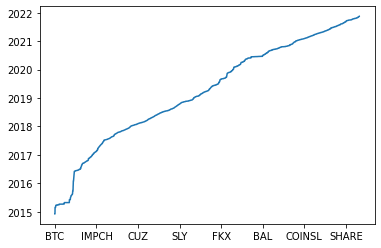

In [32]:
# for my own reference
#plt.figure(figsize=(15, 10))
#df_reduced[['FullName', 'DateCreated']].sort_values(by = 'DateCreated', ascending = True).plot() # for dataframe
df_reduced['DateCreated'].sort_values(ascending = True).plot()

In [33]:
df_reduced[['PlatformType']].value_counts() # only 2000+ entries have this value filled, majority are tokens

PlatformType
token           1988
blockchain       257
derivative       207
dtype: int64

C:\Users\wengk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


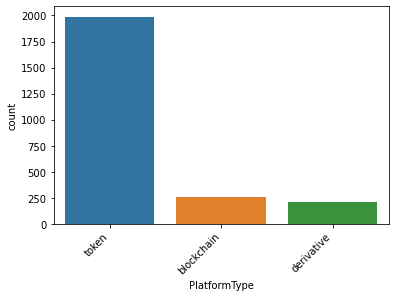

In [34]:
sns.countplot(df_reduced['PlatformType'])
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [35]:
# check what crypto assets fall under 'derivative'
df_reduced.loc[df_reduced['PlatformType'] == 'derivative']

Id                       Url    Symbol  \
EOSBULL   934063   /coins/eosbull/overview   EOSBULL   
XRPBEAR   934069   /coins/xrpbear/overview   XRPBEAR   
BNBBULL   934146   /coins/bnbbull/overview   BNBBULL   
TRXBULL   934270   /coins/trxbull/overview   TRXBULL   
TRXBEAR   934271   /coins/trxbear/overview   TRXBEAR   
...          ...                       ...       ...   
UNIDOWN   937051   /coins/unidown/overview   UNIDOWN   
UNIUP     937050     /coins/uniup/overview     UNIUP   
ETHBULL   933983   /coins/ethbull/overview   ETHBULL   
LINKDOWN  935874  /coins/linkdown/overview  LINKDOWN   
BEAR      933505      /coins/bear/overview      BEAR   

                                  FullName  \
EOSBULL        3X Long EOS Token (EOSBULL)   
XRPBEAR       3X Short XRP Token (XRPBEAR)   
BNBBULL        3X Long BNB Token (BNBBULL)   
TRXBULL        3X Long TRX Token (TRXBULL)   
TRXBEAR       3X Short TRX Token (TRXBEAR)   
...                                    ...   
UNIDOWN                  UNIDOWN (UNIDOWN)   
UNIUP                        UNIUP (UNIUP)   
ETHBULL   3X Long Ethereum Token (ETHBULL)   
LINKDOWN               LINKDOWN (LINKDOWN)   
BEAR               3X Short Bitcoin (BEAR)   

                                                Description AssetTokenStatus  \
EOSBULL   3X Long EOS Token (EOSBULL) is an ERC20 token ...              N/A   
XRPBEAR   3X Short XRP Token (XRPBEAR) is an ERC20 token...              N/A   
BNBBULL   3X Long Binance Token (BULL) is an ERC20 token...              N/A   
TRXBULL   3X Long TRX Token (TRXBULL) is an ERC20 token ...              N/A   
TRXBEAR   3X Short TRX Token (TRXBEAR) is an ERC20 token...              N/A   
...                                                     ...              ...   
UNIDOWN   Binance Leveraged Tokens are tradable assets (...              N/A   
UNIUP     Binance Leveraged Tokens are tradable assets (...              N/A   
ETHBULL   3X Long Ethereum Token (ETHBULL) is an ERC20 t...              N/A   
LINKDOWN  Binance Leveraged Tokens are tradable assets (...              N/A   
BEAR      3X Short Bitcoin Token (BEAR) is an ERC20 toke...              N/A   

             Algorithm ProofType SortOrder Sponsored  ... AssetLaunchDate  \
EOSBULL            N/A       N/A      4966     False  ...      2019-03-18   
XRPBEAR            N/A       N/A      4972     False  ...      2019-03-18   
BNBBULL            N/A       N/A      4983     False  ...      2019-05-17   
TRXBULL            N/A       N/A      4990     False  ...      2019-05-17   
TRXBEAR            N/A       N/A      4991     False  ...      2019-05-17   
...                ...       ...       ...       ...  ...             ...   
UNIDOWN   BEP-20 Token       N/A      5963     False  ...      0000-00-00   
UNIUP     BEP-20 Token       N/A      5962     False  ...      0000-00-00   
ETHBULL            N/A       N/A      4938     False  ...      2019-03-18   
LINKDOWN           N/A       N/A      5583     False  ...      0000-00-00   
BEAR               N/A       N/A      4818     False  ...      2019-03-18   

         AssetWhitepaperUrl  \
EOSBULL                       
XRPBEAR                       
BNBBULL                       
TRXBULL                       
TRXBEAR                       
...                     ...   
UNIDOWN                       
UNIUP                         
ETHBULL                       
LINKDOWN                      
BEAR                          

                                            AssetWebsiteUrl  \
EOSBULL                      https://ftx.com/tokens/EOSBULL   
XRPBEAR                      https://ftx.com/tokens/XRPBEAR   
BNBBULL                      https://ftx.com/tokens/BNBBULL   
TRXBULL                      https://ftx.com/tokens/TRXBULL   
TRXBEAR                      https://ftx.com/tokens/TRXBEAR   
...                                                     ...   
UNIDOWN   https://www.binance.com/en/support/articles/97...   
UNIUP     https://www.bin

In [36]:
# check what crypto assets fall under 'blockchain'
df_reduced.loc[df_reduced['PlatformType'] == 'blockchain']

Id                   Url Symbol              FullName  \
XPD     3646   /coins/xpd/overview    XPD     PetroDollar (XPD)   
XMY     4345   /coins/xmy/overview    XMY      MyriadCoin (XMY)   
MAID    5293  /coins/maid/overview   MAID  MaidSafe Coin (MAID)   
NSR     5295   /coins/nsr/overview    NSR        NuShares (NSR)   
CMTC   22354  /coins/cmtc/overview   CMTC      CometCoin (CMTC)   
...      ...                   ...    ...                   ...   
PART  191116  /coins/part/overview   PART        Particl (PART)   
PPC     2349   /coins/ppc/overview    PPC        PeerCoin (PPC)   
SOUL  902442  /coins/soul/overview   SOUL      Phantasma (SOUL)   
POA   793845   /coins/poa/overview    POA     Poa Network (POA)   
DOT   935731   /coins/dot/overview    DOT        Polkadot (DOT)   

                                            Description AssetTokenStatus  \
XPD   PetroDollar is a peer-to-peer digital currency...              N/A   
XMY   Myriad uses five proof of work algorithms for ...              N/A   
MAID  MaidSafe is a fully decentralized platform on ...         Finished   
NSR   NuShares are units held by individuals who wis...              N/A   
CMTC  CometCoin is a Proof of Work cryptocurrency cr...              N/A   
...                                                 ...              ...   
PART  Particl is a blockchain-based eCommerce platfo...         Finished   
PPC   A peer-to-peer crypto-currency design derived ...              N/A   
SOUL  Phantasma describes itself as a fast, secure a...              N/A   
POA   Poa Network is a public sidechain based on the...              N/A   
DOT   Polkadot development is on track to deliver a ...         Finished   

               Algorithm ProofType SortOrder Sponsored  ... AssetLaunchDate  \
XPD             SHA-256D       N/A        26     False  ...      2014-02-16   
XMY             Multiple       PoW        58     False  ...      2014-02-23   
MAID                 N/A       N/A       262     False  ...      2014-06-12   
NSR                  PoS       PoS       264     False  ...      2014-09-28   
CMTC              Scrypt       PoW       663     False  ...      2016-05-01   
...                  ...       ...       ...       ...  ...             ...   
PART                 N/A       PoS      1377     False  ...      2017-07-17   
PPC                  N/A   PoS/PoW        14     False  ...      2012-08-20   
SOUL                 N/A       PoS      2835     False  ...      2018-05-12   
POA   Proof-of-Authority       PoA      2407     False  ...      2017-07-20   
DOT                  N/A       N/A      5535     False  ...      2020-08-18   

                                     AssetWhitepaperUrl  \
XPD                                                       
XMY                                                       
MAID                                                      
NSR                                                       
CMTC                                                      
...                                                 ...   
PART                                                      
PPC                                                       
SOUL                                                      
POA                                                       
DOT   https://www.cryptocompare.com/media/38553795/p...   

                               AssetWebsiteUrl   MaxSupply MktCapPenalty  \
XPD                                       None          -1             0   
XMY                     http://myriadcoin.org/  2000000000             0   
MAID                     https://maidsafe.net/          -1             0   
NSR   https://nubits.com/nushares/introduction           0         99.99   
CMTC                    https://cometcoin.com/           0         99.99   
...                                        ...         ...           ...   
PART                        http://particl.io/          -1             0   
PPC                       

In [37]:
# check what crypto assets fall under 'token'
df_reduced.loc[df_reduced['PlatformType'] == 'token']

Id                       Url    Symbol              FullName  \
300       749869       /coins/300/overview       300       300 token (300)   
BITCNY     28019    /coins/bitcny/overview    BITCNY       bitCNY (BITCNY)   
NXC        35678       /coins/nxc/overview       NXC          Nexium (NXC)   
CHAT       52008      /coins/chat/overview      CHAT       OpenChat (CHAT)   
LA        184163        /coins/la/overview        LA          LATOKEN (LA)   
...          ...                       ...       ...                   ...   
STC       939621       /coins/stc/overview       STC    Student Coin (STC)   
NASADOGE  944611  /coins/nasadoge/overview  NASADOGE  Nasa Doge (NASADOGE)   
FAST      944613      /coins/fast/overview      FAST       Fastswap (FAST)   
TIKI      944619      /coins/tiki/overview      TIKI     Tiki Token (TIKI)   
PARAB     944622     /coins/parab/overview     PARAB     Parabolic (PARAB)   

                                                Description AssetTokenStatus  \
300       300 token is an ERC20 token. This Token was cr...              N/A   
BITCNY    bitCNY is a market pegged asset (MPA) issued o...              N/A   
NXC       Nexium is an Ethereum-based token created to b...         Finished   
CHAT      OpenChat is a blockchain-based payment platfor...              N/A   
LA        LATOKEN is developing a one-stop multi-asset t...         Finished   
...                                                     ...              ...   
STC       Student Coin builds a platform called STC Exch...         Finished   
NASADOGE  NasaDoge prevents being a ponzi with paulownia...              N/A   
FAST      FastSwap is a decentralized protocol for autom...              N/A   
TIKI      A BNB reflection token with auto-claim feature...              N/A   
PARAB     Parabolic Token has been designed to achieve a...              N/A   

         Algorithm ProofType SortOrder Sponsored  ... AssetLaunchDate  \
300            N/A       N/A      2212     False  ...      2017-07-01   
BITCNY         N/A       N/A       727     False  ...      2014-09-23   
NXC            N/A       N/A       964     False  ...      2016-05-18   
CHAT        Scrypt   PoW/PoS      1123     False  ...      2017-12-07   
LA             N/A       N/A      1340     False  ...      2017-10-18   
...            ...       ...       ...       ...  ...             ...   
STC            N/A       N/A      6710     False  ...      2020-06-25   
NASADOGE       N/A       N/A      7909     False  ...      2021-07-23   
FAST           N/A       N/A      7910     False  ...      2021-07-20   
TIKI           N/A       N/A      7912     False  ...      2021-06-15   
PARAB          N/A       N/A      7913     False  ...      2021-09-12   

                                         AssetWhitepaperUrl  \
300                                                           
BITCNY                                                        
NXC                                                           
CHAT                                                          
LA                                                            
...                                                     ...   
STC                                                           
NASADOGE                                                      
FAST                                                          
TIKI               https://www.tikitoken.finance/whitepaper   
PARAB     https://cryptocompare.com/media/38554207/parab...   

                                            AssetWebsiteUrl   MaxSupply  \
300                              http://300tokensparta.com/         300   
BITCNY                                                 None    21000000   
NXC                             http://beyond-the-void.net/  66509518.5   
CHAT                                http://www.openchat.co/          -1   
LA                                     https://latoken.com/          -1   
...                             

Based on the result generated, derivatives are leveraged tokens tagged to an underlying asset and I believe it is more like packaged asset

In [38]:
df_reduced[['BuiltOn']].value_counts() # also only 2000+ entries have this value filled, majority is built on Ethereum and Binance

BuiltOn        
ETH                1573
BNB                 310
TRX                  19
BITCI                10
ETH,BNB               9
                   ... 
HT                    1
18                    1
KAVA                  1
KSM                   1
mainnet,ETH,BNB       1
Length: 65, dtype: int64

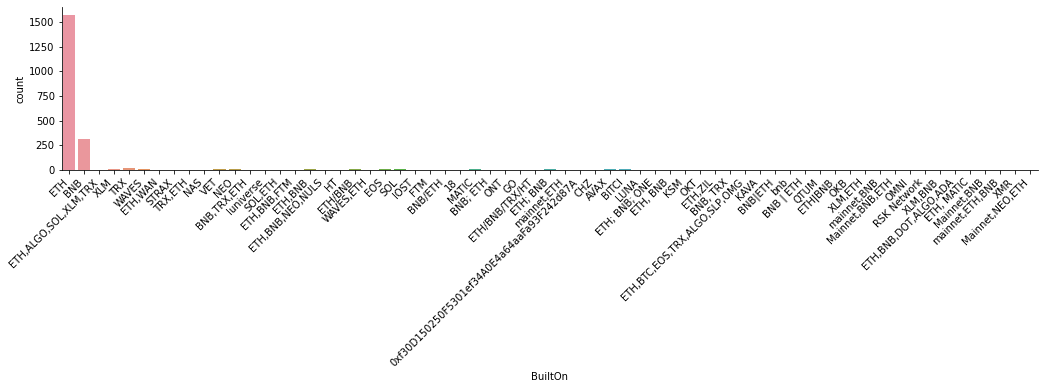

In [39]:
# figure size in inches
#rcParams['figure.figsize'] = 2,2
#plt.figure(figsize=(12, 10))

#df_temp = df_reduced[df_reduced['BuiltOn'].notna()] 

#sns.catplot(x='BuiltOn', kind = 'count', data=df_temp)
sns.catplot(x='BuiltOn', kind = 'count', height=3, aspect=5, data=df_reduced)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

#sns.catplot(x="Symbol", col="BuiltOn",

#                data=df_reduced, kind="count",

#                height=4, aspect=.7);

In [40]:
df_reduced[['BuiltOn', 'PlatformType']].value_counts() 

BuiltOn          PlatformType
ETH              token           1527
BNB              token            310
ETH              derivative        43
TRX              token             19
BITCI            token             10
                                 ... 
18               token              1
IOST             token              1
KAVA             token              1
KSM              token              1
mainnet,ETH,BNB  blockchain         1
Length: 67, dtype: int64

In [41]:
group_builton = df_reduced['Symbol'].groupby(df_coin['BuiltOn'])
print(list(group_builton))

[('0xf30D150250F5301ef34A0E4a64aaFa93F242d87A', CITY    CITY
Name: Symbol, dtype: object), ('18', AAB    AAB
Name: Symbol, dtype: object), ('AVAX', PNG    PNG
KLO    KLO
JOE    JOE
OH      OH
Name: Symbol, dtype: object), ('BITCI', BFT.BITCI      BFT.BITCI
SNFT.BITCI    SNFT.BITCI
ANKA.BITCI    ANKA.BITCI
DNZ.BITCI      DNZ.BITCI
ESES.BITCI    ESES.BITCI
KSK.BITCI      KSK.BITCI
KSTT.BITCI    KSTT.BITCI
NR1.BITCI      NR1.BITCI
TBFT.BITCI    TBFT.BITCI
TMSH.BITCI    TMSH.BITCI
Name: Symbol, dtype: object), ('BNB', CAS              CAS
TROY            TROY
SWINGBY      SWINGBY
SCB              SCB
BIFI            BIFI
              ...   
STRAY          STRAY
NASADOGE    NASADOGE
FAST            FAST
TIKI            TIKI
PARAB          PARAB
Name: Symbol, Length: 310, dtype: object), ('BNB | ETH', VLXPAD    VLXPAD
Name: Symbol, dtype: object), ('BNB, TRX', SWAPZ    SWAPZ
Name: Symbol, dtype: object), ('BNB,TRX,ETH', ANDX    ANDX
Name: Symbol, dtype: object), ('BNB/ETH', YUANG    YUANG
N

In [42]:
for coin, group in group_builton:
    print(coin)
    print(group)
    print(" ")

0xf30D150250F5301ef34A0E4a64aaFa93F242d87A
CITY    CITY
Name: Symbol, dtype: object
 
18
AAB    AAB
Name: Symbol, dtype: object
 
AVAX
PNG    PNG
KLO    KLO
JOE    JOE
OH      OH
Name: Symbol, dtype: object
 
BITCI
BFT.BITCI      BFT.BITCI
SNFT.BITCI    SNFT.BITCI
ANKA.BITCI    ANKA.BITCI
DNZ.BITCI      DNZ.BITCI
ESES.BITCI    ESES.BITCI
KSK.BITCI      KSK.BITCI
KSTT.BITCI    KSTT.BITCI
NR1.BITCI      NR1.BITCI
TBFT.BITCI    TBFT.BITCI
TMSH.BITCI    TMSH.BITCI
Name: Symbol, dtype: object
 
BNB
CAS              CAS
TROY            TROY
SWINGBY      SWINGBY
SCB              SCB
BIFI            BIFI
              ...   
STRAY          STRAY
NASADOGE    NASADOGE
FAST            FAST
TIKI            TIKI
PARAB          PARAB
Name: Symbol, Length: 310, dtype: object
 
BNB | ETH
VLXPAD    VLXPAD
Name: Symbol, dtype: object
 
BNB, TRX
SWAPZ    SWAPZ
Name: Symbol, dtype: object
 
BNB,TRX,ETH
ANDX    ANDX
Name: Symbol, dtype: object
 
BNB/ETH
YUANG    YUANG
Name: Symbol, dtype: object
 
BNB; ETH

In [43]:
builton_groupby_platform_symbol = df_reduced[['BuiltOn']].groupby([df_reduced["PlatformType"],df_reduced['Symbol']]).sum()
#df_sum = df_reduced[['Symbol']].groupby([df_reduced['PlatformType']]).sum()
builton_groupby_platform_symbol

BuiltOn
PlatformType Symbol        
blockchain   ACT          0
             ADA          0
             ADK          0
             AE           0
             AEON         0
...                     ...
token        ZUSD       ETH
             ZUT        ETH
             ZXC        ETH
             ZYN        ETH
             ZZZV2      ETH

[2452 rows x 1 columns]

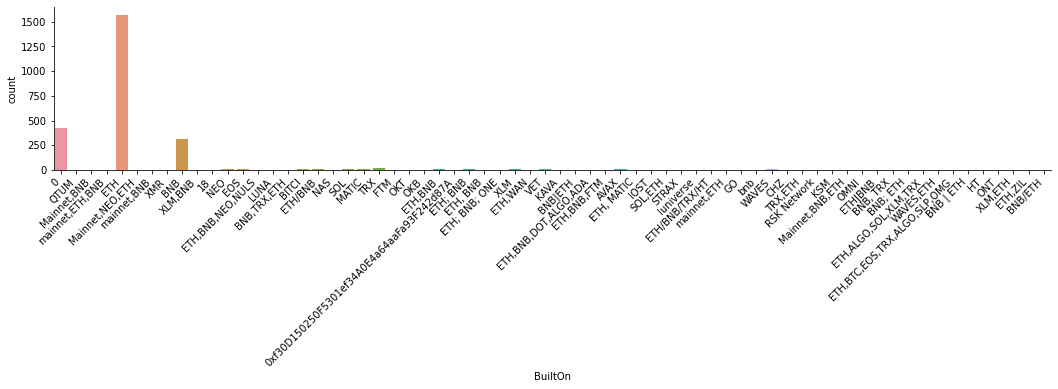

In [44]:
# A more reflective depiction with inclusion of coins filled with zero
sns.catplot(x='BuiltOn', kind = 'count', height=3, aspect=5, data=builton_groupby_platform_symbol)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

Based on the above, I believe at this point of writing, majority of the crypto assets are based on Ethereum (ETH) and Binance (BNB) algorithm

In [45]:
df_reduced['AssetTokenStatus'].value_counts()

N/A         5673
Finished    1172
Ongoing      239
Upcoming     238
Name: AssetTokenStatus, dtype: int64

C:\Users\wengk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


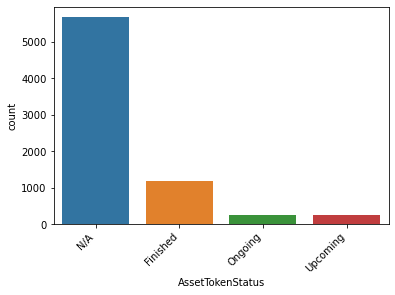

In [46]:
sns.countplot(df_reduced['AssetTokenStatus'])
plt.xticks(rotation = 45, ha = 'right')
plt.show()

Too much data, need to reduce to a manageable list to visualize, 'Rating' may be a good approach to start off with

### 2 - Focus on specific fields/columns to shortlist crypto assets

In [47]:
# look at 'Rating'
df_reduced['Rating']

42          {'Weiss': {'Rating': '', 'TechnologyAdoptionRa...
300         {'Weiss': {'Rating': '', 'TechnologyAdoptionRa...
365         {'Weiss': {'Rating': '', 'TechnologyAdoptionRa...
404         {'Weiss': {'Rating': '', 'TechnologyAdoptionRa...
433         {'Weiss': {'Rating': '', 'TechnologyAdoptionRa...
                                  ...                        
NASADOGE    {'Weiss': {'Rating': '', 'TechnologyAdoptionRa...
FAST        {'Weiss': {'Rating': '', 'TechnologyAdoptionRa...
ATH         {'Weiss': {'Rating': '', 'TechnologyAdoptionRa...
TIKI        {'Weiss': {'Rating': '', 'TechnologyAdoptionRa...
PARAB       {'Weiss': {'Rating': '', 'TechnologyAdoptionRa...
Name: Rating, Length: 7322, dtype: object

In [48]:
# identify keys to extract the data you need
df_reduced['Rating'].keys()

Index(['42', '300', '365', '404', '433', '611', '808', '888', '1337', '2015',
       ...
       'QRDO', 'IDTT', 'WOOF', 'RARE', 'STC', 'NASADOGE', 'FAST', 'ATH',
       'TIKI', 'PARAB'],
      dtype='object', length=7322)

In [49]:
# need to drill down further
df_reduced['Rating'][0]

{'Weiss': {'Rating': '',
  'TechnologyAdoptionRating': '',
  'MarketPerformanceRating': ''}}

In [50]:
# need to drill down further
df_reduced['Rating'][0].keys()

dict_keys(['Weiss'])

In [51]:
# need to drill down further
df_reduced['Rating'][0]['Weiss']

{'Rating': '', 'TechnologyAdoptionRating': '', 'MarketPerformanceRating': ''}

In [52]:
# need to drill down further
df_reduced['Rating'][0]['Weiss'].keys()

dict_keys(['Rating', 'TechnologyAdoptionRating', 'MarketPerformanceRating'])

In [53]:
# need to drill down further
df_reduced['Rating'][0]['Weiss']['Rating']

''

Above is the dict structure, noted there are 3 types of ratings, 'Rating' is a overall measure and for ease of comparison, we will use this.<br>Note that not all crypto assets are given a rating as can be seen in this output

In [54]:
# Focus on cryptocurrencies that have a rating
# Need to extract a multi-nested dictionary and append it to an empty list
lst = [] # initiate an empty list to store the 'Rating'

for i in range(len(df_reduced)):
    if df_reduced['Rating'][i]['Weiss']['Rating'] == "":
        lst.append(np.NaN) # replace "" with null values, will drop all the rows with null values later
    else:
        data = df_reduced['Rating'][i]['Weiss']['Rating']
        lst.append(data)

In [55]:
df = pd.DataFrame(lst, columns = ['Rate']) # convert list to dataframe
df.sample(100)

Rate
6588    E
4363  NaN
554   NaN
1807  NaN
4753  NaN
...   ...
314   NaN
4     NaN
7165    C
2984  NaN
7254   D+

[100 rows x 1 columns]

In [56]:
df['Rate'].value_counts() # much shorter list

D-    95
D     95
C-    81
D+    76
E+    52
C     44
E-    37
C+    33
E     32
B-    15
B      5
B+     2
A      1
A-     1
Name: Rate, dtype: int64

In [57]:
df_reduced.reset_index(drop=True, inplace=True) # reset index in preparation for the joining of the two dataframes
df_reduced

Id                       Url    Symbol              FullName  \
0       4321        /coins/42/overview        42          42 Coin (42)   
1     749869       /coins/300/overview       300       300 token (300)   
2      33639       /coins/365/overview       365         365Coin (365)   
3      21227       /coins/404/overview       404         404Coin (404)   
4     926547       /coins/433/overview       433       433 Token (433)   
...      ...                       ...       ...                   ...   
7317  944611  /coins/nasadoge/overview  NASADOGE  Nasa Doge (NASADOGE)   
7318  944613      /coins/fast/overview      FAST       Fastswap (FAST)   
7319  912943       /coins/ath/overview       ATH         Atheios (ATH)   
7320  944619      /coins/tiki/overview      TIKI     Tiki Token (TIKI)   
7321  944622     /coins/parab/overview     PARAB     Parabolic (PARAB)   

                                            Description AssetTokenStatus  \
0     Everything about 42 coin is 42 - apart from th...              N/A   
1     300 token is an ERC20 token. This Token was cr...              N/A   
2     365Coin is a Proof of Work and Proof of Stake ...              N/A   
3     404 is a PoW/PoS hybrid cryptocurrency that al...              N/A   
4     433 Token is a decentralised soccer platform t...         Finished   
...                                                 ...              ...   
7317  NasaDoge prevents being a ponzi with paulownia...              N/A   
7318  FastSwap is a decentralized protocol for autom...              N/A   
7319  Atheios is a PoW-based payment platform. It en...              N/A   
7320  A BNB reflection token with auto-claim feature...              N/A   
7321  Parabolic Token has been designed to achieve a...              N/A   

     Algorithm ProofType SortOrder Sponsored  ... AssetLaunchDate  \
0       Scrypt   PoW/PoS        34     False  ...      0000-00-00   
1          N/A       N/A      2212     False  ...      2017-07-01   
2          X11   PoW/PoS       916     False  ...      0000-00-00   
3       Scrypt   PoW/PoS       602     False  ...      0000-00-00   
4          N/A       N/A      3505     False  ...             NaN   
...        ...       ...       ...       ...  ...             ...   
7317       N/A       N/A      7909     False  ...      2021-07-23   
7318       N/A       N/A      7910     False  ...      2021-07-20   
7319    Dagger       PoW      2956     False  ...             NaN   
7320       N/A       N/A      7912     False  ...      2021-06-15   
7321       N/A       N/A      7913     False  ...      2021-09-12   

                                     AssetWhitepaperUrl  \
0                                                         
1                                                         
2                                                         
3                                                         
4                                                   NaN   
...                                                 ...   
7317                                                      
7318                                                      
7319                                                NaN   
7320           https://www.tikitoken.finance/whitepaper   
7321  https://cryptocompare.com/media/38554207/parab...   

                     AssetWebsiteUrl MaxSupply MktCapPenalty IsUsedInDefi  \
0               https://42-coin.org/         0             0            0   
1         http://300tokensparta.com/       300             0            0   
2                               None         0             0            0   
3                https://404coin.com         0             0            0   
4                                NaN       NaN           NaN          NaN   
...                              ...       ...           ...          ...   
7317       https://nasadoge.finance/        -1             0            0   
7318     https://fastswap.finance/#/        -1        

In [58]:
df_join = df_reduced.join(df, how = 'left') # join the two dataframes

In [59]:
df_join['Rate'].value_counts() 

D-    95
D     95
C-    81
D+    76
E+    52
C     44
E-    37
C+    33
E     32
B-    15
B      5
B+     2
A      1
A-     1
Name: Rate, dtype: int64

In [60]:
df_join # check if 'Rate' is joined

Id                       Url    Symbol              FullName  \
0       4321        /coins/42/overview        42          42 Coin (42)   
1     749869       /coins/300/overview       300       300 token (300)   
2      33639       /coins/365/overview       365         365Coin (365)   
3      21227       /coins/404/overview       404         404Coin (404)   
4     926547       /coins/433/overview       433       433 Token (433)   
...      ...                       ...       ...                   ...   
7317  944611  /coins/nasadoge/overview  NASADOGE  Nasa Doge (NASADOGE)   
7318  944613      /coins/fast/overview      FAST       Fastswap (FAST)   
7319  912943       /coins/ath/overview       ATH         Atheios (ATH)   
7320  944619      /coins/tiki/overview      TIKI     Tiki Token (TIKI)   
7321  944622     /coins/parab/overview     PARAB     Parabolic (PARAB)   

                                            Description AssetTokenStatus  \
0     Everything about 42 coin is 42 - apart from th...              N/A   
1     300 token is an ERC20 token. This Token was cr...              N/A   
2     365Coin is a Proof of Work and Proof of Stake ...              N/A   
3     404 is a PoW/PoS hybrid cryptocurrency that al...              N/A   
4     433 Token is a decentralised soccer platform t...         Finished   
...                                                 ...              ...   
7317  NasaDoge prevents being a ponzi with paulownia...              N/A   
7318  FastSwap is a decentralized protocol for autom...              N/A   
7319  Atheios is a PoW-based payment platform. It en...              N/A   
7320  A BNB reflection token with auto-claim feature...              N/A   
7321  Parabolic Token has been designed to achieve a...              N/A   

     Algorithm ProofType SortOrder Sponsored  ...  \
0       Scrypt   PoW/PoS        34     False  ...   
1          N/A       N/A      2212     False  ...   
2          X11   PoW/PoS       916     False  ...   
3       Scrypt   PoW/PoS       602     False  ...   
4          N/A       N/A      3505     False  ...   
...        ...       ...       ...       ...  ...   
7317       N/A       N/A      7909     False  ...   
7318       N/A       N/A      7910     False  ...   
7319    Dagger       PoW      2956     False  ...   
7320       N/A       N/A      7912     False  ...   
7321       N/A       N/A      7913     False  ...   

                                     AssetWhitepaperUrl  \
0                                                         
1                                                         
2                                                         
3                                                         
4                                                   NaN   
...                                                 ...   
7317                                                      
7318                                                      
7319                                                NaN   
7320           https://www.tikitoken.finance/whitepaper   
7321  https://cryptocompare.com/media/38554207/parab...   

                     AssetWebsiteUrl MaxSupply MktCapPenalty IsUsedInDefi  \
0               https://42-coin.org/         0             0            0   
1         http://300tokensparta.com/       300             0            0   
2                               None         0             0            0   
3                https://404coin.com         0             0            0   
4                                NaN       NaN           NaN          NaN   
...                              ...       ...           ...          ...   
7317       https://nasadoge.finance/        -1             0            0   
7318     https://fastswap.finance/#/        -1             0            1   
7319                             NaN       NaN           NaN          NaN   
7320  https://www.tikitoken.finance/        -1             0            0   
7321     https:

In [61]:
df_join.isna().any() # confirm that 'Rate' consists of null values

Id                    False
Url                   False
Symbol                False
FullName              False
Description           False
AssetTokenStatus      False
Algorithm             False
ProofType             False
SortOrder             False
Sponsored             False
Taxonomy              False
Rating                False
IsTrading             False
TotalCoinsMined        True
CirculatingSupply      True
BlockNumber            True
NetHashesPerSecond     True
BlockReward            True
BlockTime              True
AssetLaunchDate        True
AssetWhitepaperUrl     True
AssetWebsiteUrl        True
MaxSupply              True
MktCapPenalty          True
IsUsedInDefi           True
IsUsedInNft            True
PlatformType           True
BuiltOn                True
DateCreated           False
Rate                   True
dtype: bool

In [62]:
# only focus on cryptocurrencies that have a rating, drop rows without a rating
df_optimized = df_join[df_join['Rate'].notna()] 

In [63]:
df_optimized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 613 to 7308
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  569 non-null    object        
 1   Url                 569 non-null    object        
 2   Symbol              569 non-null    object        
 3   FullName            569 non-null    object        
 4   Description         569 non-null    object        
 5   AssetTokenStatus    569 non-null    object        
 6   Algorithm           569 non-null    object        
 7   ProofType           569 non-null    object        
 8   SortOrder           569 non-null    object        
 9   Sponsored           569 non-null    object        
 10  Taxonomy            569 non-null    object        
 11  Rating              569 non-null    object        
 12  IsTrading           569 non-null    object        
 13  TotalCoinsMined     539 non-null    object     

The number of cryptocurrenices has been reduced substantially, next step is to make sense of the dataset, let us look at other fields and shortlist cryptos to investigate further

In [64]:
df_optimized[['PlatformType']].value_counts() # looks like derivatives is not being rated

PlatformType
token           387
blockchain      136
dtype: int64

In [65]:
# none of the coins based on BNB is rated, we may missed out on quality coins based on this algorithm
df_optimized[['BuiltOn']].value_counts() 

BuiltOn             
ETH                     358
NEO                       6
XLM                       4
TRX                       4
BNB                       2
WAVES                     2
EOS                       2
SOL                       1
mainnet,BNB               1
XMR                       1
XLM,ETH                   1
VET                       1
OMNI                      1
RSK Network               1
NAS                       1
Mainnet,NEO,ETH           1
Mainnet,BNB,ETH           1
Mainnet,BNB               1
ETH,BNB,DOT,ALGO,ADA      1
ETH,BNB                   1
ETH, MATIC                1
mainnet,ETH,BNB           1
dtype: int64

In [66]:
df_optimized[['PlatformType', 'BuiltOn']].value_counts()

PlatformType  BuiltOn             
token         ETH                     356
              NEO                       6
              XLM                       4
              TRX                       4
              WAVES                     2
              BNB                       2
              EOS                       2
blockchain    ETH                       1
token         NAS                       1
              VET                       1
              SOL                       1
              RSK Network               1
              OMNI                      1
              ETH,BNB,DOT,ALGO,ADA      1
              Mainnet,BNB,ETH           1
blockchain    Mainnet,BNB               1
token         ETH,BNB                   1
              ETH, MATIC                1
blockchain    mainnet,ETH,BNB           1
              mainnet,BNB               1
              XMR                       1
              Mainnet,NEO,ETH           1
token         XLM,ETH                   1

In [67]:
df_optimized[['Algorithm']].value_counts()

Algorithm            
N/A                      446
Scrypt                    23
DPoS                       9
SHA-256                    8
X11                        8
X13                        6
Equihash                   6
Ethash                     5
PoS                        4
Quark                      3
Blake2b                    3
Multiple                   3
BLAKE256                   2
Groestl                    2
BEP-2                      2
SHA-512                    2
NeoScrypt                  2
CryptoNight                2
RandomX                    1
QRC-20 Token               1
Shabal256                  1
SHA3                       1
SPoS                       1
TRC-10                     1
TRC-20                     1
VBFT                       1
VeChainThor Authority      1
X11GOST                    1
XEVAN                      1
Proof-of-Authority         1
Argon2                     1
POS 3.0                    1
PHI1612                    1
BMW512 / Echo512     

In [68]:
df_optimized['IsTrading'].value_counts()

True     559
False     10
Name: IsTrading, dtype: int64

In [69]:
df_optimized[df_optimized['IsTrading'] == False]

Id                       Url    Symbol                FullName  \
1335  392253      /coins/crds/overview      CRDS          Credits (CRDS)   
4445  446051    /coins/people/overview    PEOPLE         People (PEOPLE)   
5148  368694  /coins/atmchain/overview  ATMCHAIN     ATMChain (ATMCHAIN)   
6708  400693       /coins/icc/overview       ICC   Insta Cash Coin (ICC)   
6717  638142      /coins/omgc/overview      OMGC  OmiseGO Classic (OMGC)   
6812  255293      /coins/trvl/overview      TRVL      Travel Coin (TRVL)   
6899  859637      /coins/flmc/overview      FLMC        FOLM coin (FLMC)   
7145  926651     /coins/coing/overview     COING        Coingrid (COING)   
7150  402805      /coins/kngn/overview      KNGN       KingN Coin (KNGN)   
7221  661719    /coins/forcec/overview    FORCEC     Force Coin (FORCEC)   

                                            Description AssetTokenStatus  \
1335  Credits is a PoW cryptocurrency based on Argon...              N/A   
4445  People is a Proof of Work cryptocurrency based...              N/A   
5148  ATMChain aims to create a digital media platfo...              N/A   
6708  Insta Cash Coin is a PoW cryptocurrency based ...              N/A   
6717  The OmiseGO Classic is a PoW/PoS hybrid crypto...              N/A   
6812  Travelcoin will allow travelers, agencies and ...         Finished   
6899  Folm is PoW Masternode cryptocurrency based on...              N/A   
7145  Coingrid is developing a cryptocurrency exchan...         Finished   
7150  KingN Coin is a PoW/PoS cryptocurrency based o...              N/A   
7221  Force Coin is a PoS cryptocurrency.Click here ...              N/A   

     Algorithm ProofType SortOrder Sponsored  ... AssetWhitepaperUrl  \
1335    Argon2       N/A      1861     False  ...                NaN   
4445    Scrypt       PoW      1940     False  ...                NaN   
5148       N/A       N/A      1777     False  ...                NaN   
6708   SHA-256       PoW      1875     False  ...                NaN   
6717    Scrypt   PoW/PoS      2037     False  ...                NaN   
6812       N/A       N/A      1550     False  ...                NaN   
6899   PHI1612       PoW      2606     False  ...                NaN   
7145       N/A       N/A      3538     False  ...                NaN   
7150    Scrypt   PoW/PoS      1879     False  ...                NaN   
7221       N/A       PoS      2064     False  ...                      

            AssetWebsiteUrl MaxSupply MktCapPenalty IsUsedInDefi IsUsedInNft  \
1335                    NaN       NaN           NaN          NaN         NaN   
4445                    NaN       NaN           NaN          NaN         NaN   
5148                    NaN       NaN           NaN          NaN         NaN   
6708                    NaN       NaN           NaN          NaN         NaN   
6717                    NaN       NaN           NaN          NaN         NaN   
6812                    NaN       NaN           NaN          NaN         NaN   
6899                    NaN       NaN           NaN          NaN         NaN   
7145                    NaN       NaN           NaN          NaN         NaN   
7150                    NaN       NaN           NaN          NaN         NaN   
7221  https://forcecoin.io/         0             0            0           0   

     PlatformType BuiltOn         DateCreated Rate  
1335          NaN     NaN 2017-11-19 18:52:53   D-  
4445          NaN     NaN 2017-12-07 11:00:48   E-  
5148          NaN     NaN 2017-11-06 11:00:59   E-  
6708          NaN     NaN 2017-11-23 18:03:41   E-  
6717          NaN     NaN 2018-01-08 11:06:01   C-  
6812          NaN     NaN 2017-08-31 13:35:46   D-  
6899          NaN     NaN 2018-04-23 08:16:25    E  
7145          NaN     NaN 2018-11-12 15:38:56    D  
7150          NaN     NaN 2017-11-24 17:37:50   D+  
7221          NaN     NaN 2018-01-11 17:58:14   D-  

[10 rows x 30 columns]

In [70]:
# drop rows with 'IsTrading' values = False
#df_optimized = df_optimized[df_optimized['IsTrading'] == True]
#df_optimized['IsTrading'].value_counts()

In [71]:
df_optimized['AssetTokenStatus'].value_counts()

N/A         390
Finished    171
Upcoming      7
Ongoing       1
Name: AssetTokenStatus, dtype: int64

In [72]:
df_optimized['Rate'].sort_values(ascending = True).value_counts(ascending = True)

A      1
A-     1
B+     2
B      5
B-    15
E     32
C+    33
E-    37
C     44
E+    52
D+    76
C-    81
D     95
D-    95
Name: Rate, dtype: int64

In [73]:
df_optimized[['FullName', 'IsTrading', 'AssetTokenStatus', 'BuiltOn', 'Rate']].sort_values(by = ['Rate'])
#df_optimized.to_excel("optimized.xlsx")

FullName IsTrading AssetTokenStatus BuiltOn  \
6997                     Ethereum (ETH)      True         Finished     NaN   
7086                      Bitcoin (BTC)      True              N/A     NaN   
6875       Uniswap Protocol Token (UNI)      True              N/A     ETH   
6895                        Tezos (XTZ)      True         Finished     NaN   
7307                    Polygon (MATIC)      True              N/A     ETH   
...                                 ...       ...              ...     ...   
6767                         Ubiq (UBQ)      True              N/A     NaN   
6753               Auroracoin (AURORAC)      True              N/A     BNB   
6708              Insta Cash Coin (ICC)     False              N/A     NaN   
6686  WaykiChain Governance Coin (WGRT)      True              N/A     NaN   
6872                   V Systems (VSYS)      True              N/A     NaN   

     Rate  
6997    A  
7086   A-  
6875    B  
6895    B  
7307    B  
...   ...  
6767   E-  
6753   E-  
6708   E-  
6686   E-  
6872   E-  

[569 rows x 5 columns]

Column 'AssetTokenStatus' does not seem to be important, column 'IsTrading' should be used as reference to confirm if cryptocurrency is being traded

In [74]:
# drop column 'AssetTokenStatus'
df_optimized = df_optimized.drop(['AssetTokenStatus'], axis = 1)
df_optimized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 613 to 7308
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  569 non-null    object        
 1   Url                 569 non-null    object        
 2   Symbol              569 non-null    object        
 3   FullName            569 non-null    object        
 4   Description         569 non-null    object        
 5   Algorithm           569 non-null    object        
 6   ProofType           569 non-null    object        
 7   SortOrder           569 non-null    object        
 8   Sponsored           569 non-null    object        
 9   Taxonomy            569 non-null    object        
 10  Rating              569 non-null    object        
 11  IsTrading           569 non-null    object        
 12  TotalCoinsMined     539 non-null    object        
 13  CirculatingSupply   539 non-null    object     

In [75]:
df_optimized[['FullName', 'PlatformType', 'BuiltOn', 'Rate']].sort_values(by = ['Rate'])

FullName PlatformType BuiltOn Rate
6997                     Ethereum (ETH)   blockchain     NaN    A
7086                      Bitcoin (BTC)   blockchain     NaN   A-
6875       Uniswap Protocol Token (UNI)        token     ETH    B
6895                        Tezos (XTZ)   blockchain     NaN    B
7307                    Polygon (MATIC)        token     ETH    B
...                                 ...          ...     ...  ...
6767                         Ubiq (UBQ)   blockchain     NaN   E-
6753               Auroracoin (AURORAC)        token     BNB   E-
6708              Insta Cash Coin (ICC)          NaN     NaN   E-
6686  WaykiChain Governance Coin (WGRT)   blockchain     NaN   E-
6872                   V Systems (VSYS)   blockchain     NaN   E-

[569 rows x 4 columns]

In [76]:
# drop rows with 'Rate' lower than B-
df_shortlist = df_optimized[df_optimized['Rate'].isin(['A', 'A-', 'B+', 'B', 'B-'])]
df_shortlist['Rate'].sort_values(ascending = True).value_counts(ascending = True)

A      1
A-     1
B+     2
B      5
B-    15
Name: Rate, dtype: int64

C:\Users\wengk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


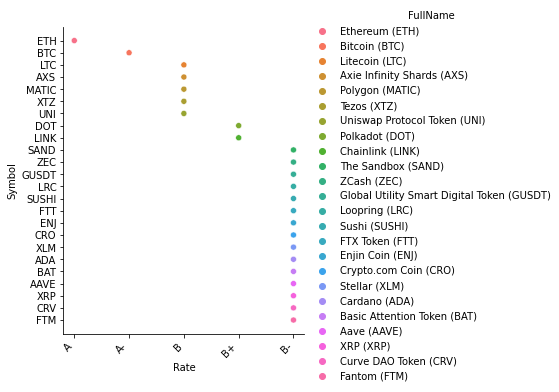

In [77]:
#rcParams['figure.figsize'] = 10, 10
#plt.figure(figsize=(15, 10))

df_shortlist_sort = df_shortlist.sort_values(by = 'Rate', ascending = True)

# create data
x = df_shortlist_sort['Rate']
y = df_shortlist_sort['Symbol']
#z = df_shortlist['Symbol'].value_counts()
 
# Change color with c and alpha
#plt.scatter(x, y, alpha=0.4, label = df_shortlist['Symbol'])

sns.relplot(x, y, hue = df_shortlist_sort['FullName'])
#sns.histplot(data=df_shortlist, x=x, hue="FullName", multiple="stack")
#plt.legend()
plt.xticks(rotation = 45, ha = 'right')

# show the graph
plt.show()

The above are shorlisted with at least a rating of B-, the list consists of quite a few recommended by YouTubers and from internet

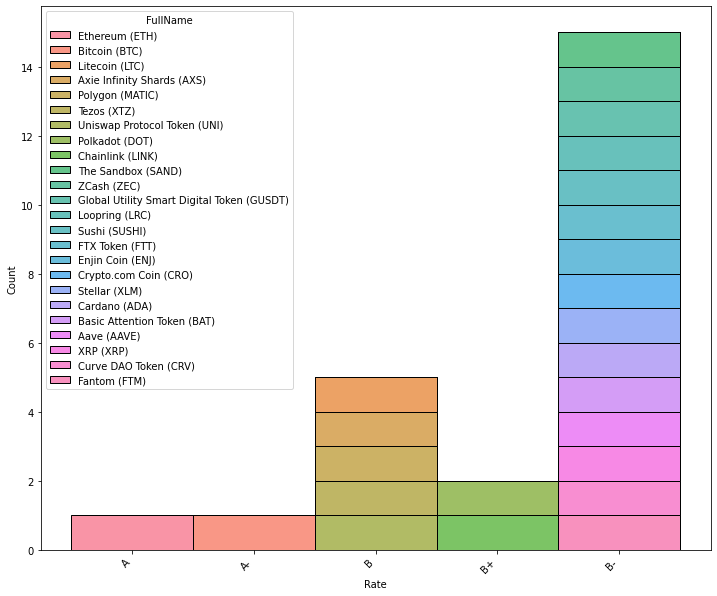

In [78]:
#rcParams['figure.figsize'] = 10, 10
plt.figure(figsize=(12, 10))

# create data
x = df_shortlist_sort['Rate']
y = df_shortlist_sort['Symbol']
#z = df_shortlist['Symbol'].value_counts()
 
# Change color with c and alpha
#plt.scatter(x, y, alpha=0.4, label = df_shortlist['Symbol'])

#sns.relplot(x, y, hue = df_shortlist['FullName'])
sns.histplot(data=df_shortlist_sort, x=x, hue="FullName", multiple="stack")
#plt.legend()
plt.xticks(rotation = 45, ha = 'right')

# show the graph
plt.show()

In [79]:
df_shortlist['AssetLaunchDate'] = pd.to_datetime(df_shortlist['AssetLaunchDate'])
df_shortlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 6606 to 7307
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  24 non-null     object        
 1   Url                 24 non-null     object        
 2   Symbol              24 non-null     object        
 3   FullName            24 non-null     object        
 4   Description         24 non-null     object        
 5   Algorithm           24 non-null     object        
 6   ProofType           24 non-null     object        
 7   SortOrder           24 non-null     object        
 8   Sponsored           24 non-null     object        
 9   Taxonomy            24 non-null     object        
 10  Rating              24 non-null     object        
 11  IsTrading           24 non-null     object        
 12  TotalCoinsMined     24 non-null     object        
 13  CirculatingSupply   24 non-null     object     

C:\Users\wengk\AppData\Local\Temp/ipykernel_25044/684918233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shortlist['AssetLaunchDate'] = pd.to_datetime(df_shortlist['AssetLaunchDate'])


In [80]:
# sort by 'CirculatingSupply', Circulating Supply is the total number of coins or tokens that are actively available for trade. Noted that there are zeros, suspect data incomplete
df_shortlist[['FullName', 'PlatformType', 'BuiltOn', 'IsUsedInDefi', 
              'IsUsedInNft', 'NetHashesPerSecond', 'AssetLaunchDate', 
              'Rate', 'CirculatingSupply']].sort_values(by = 'CirculatingSupply', ascending = True)

FullName PlatformType BuiltOn  \
7068                  Axie Infinity Shards (AXS)        token     ETH   
7205                            Enjin Coin (ENJ)        token     ETH   
7167                       Curve DAO Token (CRV)        token     ETH   
7163                       Crypto.com Coin (CRO)        token     ETH   
7281                                 ZCash (ZEC)   blockchain     NaN   
6938                          The Sandbox (SAND)        token     ETH   
7279  Global Utility Smart Digital Token (GUSDT)        token     ETH   
7253                              Loopring (LRC)        token     ETH   
7035                                 Aave (AAVE)        token     ETH   
7224                             FTX Token (FTT)        token     ETH   
7086                               Bitcoin (BTC)   blockchain     NaN   
7250                              Litecoin (LTC)   blockchain     NaN   
6997                              Ethereum (ETH)   blockchain     NaN   
6697                               Sushi (SUSHI)        token     ETH   
7305                              Polkadot (DOT)   blockchain     NaN   
7138                            Chainlink (LINK)        token     ETH   
6875                Uniswap Protocol Token (UNI)        token     ETH   
6895                                 Tezos (XTZ)   blockchain     NaN   
7077                 Basic Attention Token (BAT)        token     ETH   
6606                                Fantom (FTM)   blockchain     NaN   
7307                             Polygon (MATIC)        token     ETH   
6915                               Stellar (XLM)   blockchain     NaN   
7130                               Cardano (ADA)   blockchain     NaN   
6944                                   XRP (XRP)   blockchain     NaN   

     IsUsedInDefi IsUsedInNft     NetHashesPerSecond AssetLaunchDate Rate  \
7068            0           1                      0      2020-10-27    B   
7205            1           1                      0      2017-06-23   B-   
7167            1           0                      0      2020-08-13   B-   
7163            0           0                      0      2019-11-14   B-   
7281            0           0             6284483114      2016-10-28   B-   
6938            0           1                      0      2019-10-29   B-   
7279            0           0                      0      2020-01-11   B-   
7253            1           0                      0      2017-08-06   B-   
7035            1           0                      0      2020-10-02   B-   
7224            0           0                      0      2019-04-21   B-   
7086            0           0  159125367855125500000      2009-01-03   A-   
7250            0           0        332304094275326      2011-10-13    B   
6997            0           0     841401819962419.75      2015-07-30    A   
6697            1           0                      0      2020-08-30   B-   
7305            0           0                      0      2020-08-18   B+   
7138            1           0                      0      2017-09-19   B+   
6875            1           0                      0      2020-09-17    B   
6895            0           1                      0      2018-06-30    B   
7077            0           0                      0      2017-05-31   B-   
6606            1           1                      0      2018-06-15   B-   
7307            0           0                      0      2018-03-26    B   
6915            0           0                      0      2014-07-31   B-   
7130            0           0                      0      2017-10-05   B-   
6944            0           0                      0      2013-01-01   B-   

       CirculatingSupply  
7068                   0  
7205                   0  
7167                   0  
7163                   0  
7281                   0  
6938                   0  
7279                   0  
7253                   0  
7035                   0  
7224              

The 'CirculatingSupply' data may be incomplete as there are zeros, surprisingly Bitcoin supply is not high at all, this also means that it does not translate that coins launched earlier will have higher market supply. <br><br>One can calculate the total market capitalization of a coin by multiplying a coin's market price with the number of circulating coins, the recommendation I read is to look for small market caps coins. <br><br>Other factors might be of interest are 'NetHashesPerSecond', 'IsUsedInDefi' and 'IsUsedInNft'. Hash rates are more important for miners, higher hash rates mean the network is larger and more secure but it also makes it more difficult to mine. <br><br>As for DeFi and NFT, it means Decentralized Finance and Non-Fungible Tokens. My sense is that these are the key technology and trend in blockchain but more needs to be researched into. Again the data provided might not be accurate (ETH does support DeFi, maybe the interpretation is different vs my understanding) and there is a need to reach out to other sources to validate

In [81]:
# sort by 'AssetLaunchDate'
df_shortlist[['FullName', 'PlatformType', 'BuiltOn', 
              'IsUsedInDefi', 'IsUsedInNft', 'NetHashesPerSecond', 
              'Rate', 'CirculatingSupply', 'AssetLaunchDate'
             ]].sort_values(by = 'AssetLaunchDate', ascending = True)

FullName PlatformType BuiltOn  \
7086                               Bitcoin (BTC)   blockchain     NaN   
7250                              Litecoin (LTC)   blockchain     NaN   
6944                                   XRP (XRP)   blockchain     NaN   
6915                               Stellar (XLM)   blockchain     NaN   
6997                              Ethereum (ETH)   blockchain     NaN   
7281                                 ZCash (ZEC)   blockchain     NaN   
7077                 Basic Attention Token (BAT)        token     ETH   
7205                            Enjin Coin (ENJ)        token     ETH   
7253                              Loopring (LRC)        token     ETH   
7138                            Chainlink (LINK)        token     ETH   
7130                               Cardano (ADA)   blockchain     NaN   
7307                             Polygon (MATIC)        token     ETH   
6606                                Fantom (FTM)   blockchain     NaN   
6895                                 Tezos (XTZ)   blockchain     NaN   
7224                             FTX Token (FTT)        token     ETH   
6938                          The Sandbox (SAND)        token     ETH   
7163                       Crypto.com Coin (CRO)        token     ETH   
7279  Global Utility Smart Digital Token (GUSDT)        token     ETH   
7167                       Curve DAO Token (CRV)        token     ETH   
7305                              Polkadot (DOT)   blockchain     NaN   
6697                               Sushi (SUSHI)        token     ETH   
6875                Uniswap Protocol Token (UNI)        token     ETH   
7035                                 Aave (AAVE)        token     ETH   
7068                  Axie Infinity Shards (AXS)        token     ETH   

     IsUsedInDefi IsUsedInNft     NetHashesPerSecond Rate   CirculatingSupply  \
7086            0           0  159125367855125500000   A-            18873906   
7250            0           0        332304094275326    B     68990495.733471   
6944            0           0                      0   B-         47158974920   
6915            0           0                      0   B-  24286103727.452324   
6997            0           0     841401819962419.75    A       118350847.124   
7281            0           0             6284483114   B-                   0   
7077            0           0                      0   B-   1490348708.447351   
7205            1           1                      0   B-                   0   
7253            1           0                      0   B-                   0   
7138            1           0                      0   B+        458009553.99   
7130            0           0                      0   B-  32807796254.533077   
7307            0           0                      0    B        6720693342.9   
6606            1           1                      0   B-   2615146105.479841   
6895            0           1                      0    B    843887380.217547   
7224            0           0                      0   B-                   0   
6938            0           1                      0   B-                   0   
7163            0           0                      0   B-                   0   
7279            0           0                      0   B-                   0   
7167            1           0                      0   B-                   0   
7305            0           0                      0   B+    323399359.291097   
6697            1           0                      0   B-    213651263.592474   
6875            1           0                      0    B    554977939.164018   
7035            1           0                      0   B-                   0   
7068            0           1                      0    B                   0   

     AssetLaunchDate  
7086      2009-01-03  
7250      2011-10-13  
6944      2013-01-01  
6915      2014-07-31  
6997      2015-07-30  
7281      2016-10-28  
7077      2017-05-31  
7205

In [82]:
# sort by 'Rate'
df_shortlist[['FullName', 'PlatformType', 
              'BuiltOn', 'IsUsedInDefi', 'IsUsedInNft', 
              'NetHashesPerSecond', 'CirculatingSupply', 
              'AssetLaunchDate', 'Rate']].sort_values(by = 'Rate', ascending = True)

FullName PlatformType BuiltOn  \
6997                              Ethereum (ETH)   blockchain     NaN   
7086                               Bitcoin (BTC)   blockchain     NaN   
7250                              Litecoin (LTC)   blockchain     NaN   
7068                  Axie Infinity Shards (AXS)        token     ETH   
7307                             Polygon (MATIC)        token     ETH   
6895                                 Tezos (XTZ)   blockchain     NaN   
6875                Uniswap Protocol Token (UNI)        token     ETH   
7305                              Polkadot (DOT)   blockchain     NaN   
7138                            Chainlink (LINK)        token     ETH   
6938                          The Sandbox (SAND)        token     ETH   
7281                                 ZCash (ZEC)   blockchain     NaN   
7279  Global Utility Smart Digital Token (GUSDT)        token     ETH   
7253                              Loopring (LRC)        token     ETH   
6697                               Sushi (SUSHI)        token     ETH   
7224                             FTX Token (FTT)        token     ETH   
7205                            Enjin Coin (ENJ)        token     ETH   
7163                       Crypto.com Coin (CRO)        token     ETH   
6915                               Stellar (XLM)   blockchain     NaN   
7130                               Cardano (ADA)   blockchain     NaN   
7077                 Basic Attention Token (BAT)        token     ETH   
7035                                 Aave (AAVE)        token     ETH   
6944                                   XRP (XRP)   blockchain     NaN   
7167                       Curve DAO Token (CRV)        token     ETH   
6606                                Fantom (FTM)   blockchain     NaN   

     IsUsedInDefi IsUsedInNft     NetHashesPerSecond   CirculatingSupply  \
6997            0           0     841401819962419.75       118350847.124   
7086            0           0  159125367855125500000            18873906   
7250            0           0        332304094275326     68990495.733471   
7068            0           1                      0                   0   
7307            0           0                      0        6720693342.9   
6895            0           1                      0    843887380.217547   
6875            1           0                      0    554977939.164018   
7305            0           0                      0    323399359.291097   
7138            1           0                      0        458009553.99   
6938            0           1                      0                   0   
7281            0           0             6284483114                   0   
7279            0           0                      0                   0   
7253            1           0                      0                   0   
6697            1           0                      0    213651263.592474   
7224            0           0                      0                   0   
7205            1           1                      0                   0   
7163            0           0                      0                   0   
6915            0           0                      0  24286103727.452324   
7130            0           0                      0  32807796254.533077   
7077            0           0                      0   1490348708.447351   
7035            1           0                      0                   0   
6944            0           0                      0         47158974920   
7167            1           0                      0                   0   
6606            1           1                      0   2615146105.479841   

     AssetLaunchDate Rate  
6997      2015-07-30    A  
7086      2009-01-03   A-  
7250      2011-10-13    B  
7068      2020-10-27    B  
7307      2018-03-26    B  
6895      2018-06-30    B  
6875      2020-09-17    B  
7305      2020-08-18   B+  
7138      2017-09-19   B+  
6938      2019-10-29   B-  
7281 

In [83]:
#output_notebook()
output_file("CryptoLaunchDatevsSupply.html")

source = ColumnDataSource(df_shortlist)

p = figure(x_axis_type = 'datetime')

p.circle(x = 'AssetLaunchDate',
         y = 'CirculatingSupply',
         source = source,
         fill_alpha = 0.2,
         size = 10,
         #legend_field = 'FullName',
         #location = (0, -30),
         #color = 'green',
         fill_color = factor_cmap(('Symbol'), palette = Category20[20], factors = source.data['Symbol']))

#legend = Legend(items=list(source.data['Symbol']), location=(0, -30))
#p.add_layout(legend, 'right')

p.title.text = 'Shorlisted Cryptocurrencies Launch Date vs Circulating Supply'
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Circulating Supply'

#p.xgrid.grid_line_color = 'red'
#p.ygrid.grid_line_color = 'grey'

#p.y_range.start = 0
#p.y_range.end = 10

#p.legend.orientation = 'horizontal'
#p.legend.location = 'top_center'

hover = HoverTool(formatters={'@AssetLaunchDate': 'datetime'})
hover.tooltips = [
    ('Launch Date', '@AssetLaunchDate{%Y-%m-%d}'), # Description, Reference to Column)
    ('Supply', '@CirculatingSupply'),
    ('Name', '@FullName')       
]

p.add_tools(hover)
show(p)

Plotting using Bokeh also shows that there is no relation between 'CirculatingSupply' and 'AssetLaunchDate'

In [84]:
#output_notebook()
output_file("CryptoMktSupply.html")

df_shortlist_sortbySupply = df_shortlist.sort_values(by = 'CirculatingSupply', ascending = False)

source = ColumnDataSource(df_shortlist_sortbySupply)

p = figure(y_range = source.data['FullName'], plot_width = 800, plot_height = 400)

p.hbar(y = 'FullName',
       height = 0.5,
       left = 0,
       right = 'CirculatingSupply',
       source = source,
       #legend_field = 'FullName',
       line_color = 'black',
       fill_color = factor_cmap(('Symbol'), palette = Category20[20], factors = source.data['Symbol']))

p.title.text = 'Shorlisted Cryptocurrencies sort by Circulating Supply'
p.xaxis.axis_label = 'Circulating Supply'
p.yaxis.axis_label = 'Cryptocurrencies'

#p.y_range.start = 0
#p.y_range.end = 10

hover = HoverTool(formatters={'@AssetLaunchDate': 'datetime'})
hover.tooltips = [
    ('Launch Date', '@AssetLaunchDate{%Y-%m-%d}'), # Description, Reference to Column)
    ('Supply', '@CirculatingSupply'),
    ('Name', '@FullName'),
    ('Rating', '@Rate')
]

p.add_tools(hover)

show(p)

A more interpretable view of the cryptocurrencies' 'CirculatingSupply' in ascending order

# 3 - Look at other api data to compare

<font color='green'>Toplist by 24H Volume Full Data</font><br><font color='blue'> - Get a number of top coins by their total volume across all markets in the last 24 hours. Default value is first page (0) and the top 10 coins.</font>

In [85]:
url = "https://min-api.cryptocompare.com/data/top/totalvolfull?limit=30&tsym=USD" # change limit to 30

result = requests.get(url)

result.status_code # to check if it is a successful get, 200 means ok

200

In [86]:
data = result.json()
data

{'Message': 'Success',
 'Type': 100,
 'MetaData': {'Count': 3276},
 'SponsoredData': [],
 'Data': [{'CoinInfo': {'Id': '1182',
    'Name': 'BTC',
    'FullName': 'Bitcoin',
    'Internal': 'BTC',
    'ImageUrl': '/media/37746251/btc.png',
    'Url': '/coins/btc/overview',
    'Algorithm': 'SHA-256',
    'ProofType': 'PoW',
    'Rating': {'Weiss': {'Rating': 'A-',
      'TechnologyAdoptionRating': 'A-',
      'MarketPerformanceRating': 'A-'}},
    'NetHashesPerSecond': 159125367855125500000,
    'BlockNumber': 710068,
    'BlockTime': 608,
    'BlockReward': 6.25,
    'AssetLaunchDate': '2009-01-03',
    'MaxSupply': 20999999.9769,
    'Type': 1,
    'DocumentType': 'Webpagecoinp'},
   'RAW': {'USD': {'TYPE': '5',
     'MARKET': 'CCCAGG',
     'FROMSYMBOL': 'BTC',
     'TOSYMBOL': 'USD',
     'FLAGS': '2052',
     'PRICE': 59556.87,
     'LASTUPDATE': 1637119850,
     'MEDIAN': 59542.8,
     'LASTVOLUME': 0.0001,
     'LASTVOLUMETO': 5.9549,
     'LASTTRADEID': '892238529',
     'VOLUME

In [87]:
data.keys()

dict_keys(['Message', 'Type', 'MetaData', 'SponsoredData', 'Data', 'RateLimit', 'HasWarning'])

In [88]:
data['Data']

[{'CoinInfo': {'Id': '1182',
   'Name': 'BTC',
   'FullName': 'Bitcoin',
   'Internal': 'BTC',
   'ImageUrl': '/media/37746251/btc.png',
   'Url': '/coins/btc/overview',
   'Algorithm': 'SHA-256',
   'ProofType': 'PoW',
   'Rating': {'Weiss': {'Rating': 'A-',
     'TechnologyAdoptionRating': 'A-',
     'MarketPerformanceRating': 'A-'}},
   'NetHashesPerSecond': 159125367855125500000,
   'BlockNumber': 710068,
   'BlockTime': 608,
   'BlockReward': 6.25,
   'AssetLaunchDate': '2009-01-03',
   'MaxSupply': 20999999.9769,
   'Type': 1,
   'DocumentType': 'Webpagecoinp'},
  'RAW': {'USD': {'TYPE': '5',
    'MARKET': 'CCCAGG',
    'FROMSYMBOL': 'BTC',
    'TOSYMBOL': 'USD',
    'FLAGS': '2052',
    'PRICE': 59556.87,
    'LASTUPDATE': 1637119850,
    'MEDIAN': 59542.8,
    'LASTVOLUME': 0.0001,
    'LASTVOLUMETO': 5.9549,
    'LASTTRADEID': '892238529',
    'VOLUMEDAY': 7061.493318140083,
    'VOLUMEDAYTO': 420149283.27539515,
    'VOLUME24HOUR': 51133.972972710006,
    'VOLUME24HOURTO': 30

In [89]:
df_coin = pd.DataFrame(data['Data'])

df_coin
#df_coin.to_excel('rawdata.xlsx')

CoinInfo  \
0   {'Id': '1182', 'Name': 'BTC', 'FullName': 'Bit...   
1   {'Id': '7605', 'Name': 'ETH', 'FullName': 'Eth...   
2   {'Id': '204788', 'Name': 'BNB', 'FullName': 'B...   
3   {'Id': '934443', 'Name': 'SOL', 'FullName': 'S...   
4   {'Id': '936179', 'Name': 'SAND', 'FullName': '...   
5   {'Id': '5031', 'Name': 'XRP', 'FullName': 'XRP...   
6   {'Id': '3808', 'Name': 'LTC', 'FullName': 'Lit...   
7   {'Id': '935731', 'Name': 'DOT', 'FullName': 'P...   
8   {'Id': '940776', 'Name': 'SHIB', 'FullName': '...   
9   {'Id': '321992', 'Name': 'ADA', 'FullName': 'C...   
10  {'Id': '932135', 'Name': 'BUSD', 'FullName': '...   
11  {'Id': '310829', 'Name': 'TRX', 'FullName': 'T...   
12  {'Id': '171986', 'Name': 'USDT', 'FullName': '...   
13  {'Id': '935805', 'Name': 'AVAX', 'FullName': '...   
14  {'Id': '4432', 'Name': 'DOGE', 'FullName': 'Do...   
15  {'Id': '199148', 'Name': 'MANA', 'FullName': '...   
16  {'Id': '213663', 'Name': 'FIL', 'FullName': 'F...   
17  {'Id': '309621', 'Name': 'LINK', 'FullName': '...   
18  {'Id': '187440', 'Name': 'OMG', 'FullName': 'O...   
19  {'Id': '318169', 'Name': 'LRC', 'FullName': 'L...   
20  {'Id': '931668', 'Name': 'LUNA', 'FullName': '...   
21  {'Id': '236131', 'Name': 'VET', 'FullName': 'V...   
22  {'Id': '166503', 'Name': 'EOS', 'FullName': 'E...   
23  {'Id': '202330', 'Name': 'BCH', 'FullName': 'B...   
24  {'Id': '931799', 'Name': 'CHZ', 'FullName': 'C...   
25  {'Id': '930246', 'Name': 'MATIC', 'FullName': ...   
26  {'Id': '930992', 'Name': 'ALGO', 'FullName': '...   
27  {'Id': '199107', 'Name': 'ATOM', 'FullName': '...   
28  {'Id': '5324', 'Name': 'ETC', 'FullName': 'Eth...   
29  {'Id': '928158', 'Name': 'FTM', 'FullName': 'F...   

                                                  RAW  \
0   {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
1   {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
2   {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
3   {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
4   {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
5   {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
6   {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
7   {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
8   {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
9   {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
10  {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
11  {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
12  {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
13  {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
14  {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
15  {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
16  {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
17  {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
18  {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
19  {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
20  {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
21  {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
22  {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
23  {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
24  {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
25  {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
26  {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
27  {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
28  {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   
29  {'USD': {'TYPE': '5', 'MARKET': 'CCCAGG', 'FRO...   

                                              DISPLAY  
0   {'USD': {'FROMSYMBOL': 'Ƀ', 'TOSYMBOL': '$', '...  
1   {'USD': {'FROMSYMBOL': 'Ξ', 'TOSYMBOL': '$', '...  
2   {'USD': {'FROMSYMBOL': 'BNB', 'TOSYMBOL': '$',...  
3   {'USD': {'FROMSYMBOL': 'SOL', 'TOSYMBOL': '$',...  
4   {'USD': {'FROMSYMBOL': 'SAND', 'TOSYMBOL': '$'...  
5   {'USD': {'FROMSYMBOL': 'XRP', 'TOSYMBOL': '$',...  
6   {'USD': {'FROMSYMBOL': 'Ł', 'TOSYMBOL': '$', '...  
7   {'USD': {'FROMSYMBOL': 'DOT', 'TOSYMBOL': '$',...  
8   {

In [90]:
data['Data'][0]['RAW']['USD']

{'TYPE': '5',
 'MARKET': 'CCCAGG',
 'FROMSYMBOL': 'BTC',
 'TOSYMBOL': 'USD',
 'FLAGS': '2052',
 'PRICE': 59556.87,
 'LASTUPDATE': 1637119850,
 'MEDIAN': 59542.8,
 'LASTVOLUME': 0.0001,
 'LASTVOLUMETO': 5.9549,
 'LASTTRADEID': '892238529',
 'VOLUMEDAY': 7061.493318140083,
 'VOLUMEDAYTO': 420149283.27539515,
 'VOLUME24HOUR': 51133.972972710006,
 'VOLUME24HOURTO': 3081619587.5084553,
 'OPENDAY': 60109.52,
 'HIGHDAY': 60429.96,
 'LOWDAY': 58620.31,
 'OPEN24HOUR': 60947.07,
 'HIGH24HOUR': 61562.03,
 'LOW24HOUR': 58581.36,
 'LASTMARKET': 'Bitfinex',
 'VOLUMEHOUR': 2215.3048624600224,
 'VOLUMEHOURTO': 130800282.975213,
 'OPENHOUR': 59403.16,
 'HIGHHOUR': 59560.94,
 'LOWHOUR': 58620.31,
 'TOPTIERVOLUME24HOUR': 51133.79509271,
 'TOPTIERVOLUME24HOURTO': 3081608634.322595,
 'CHANGE24HOUR': -1390.199999999997,
 'CHANGEPCT24HOUR': -2.2809956245640635,
 'CHANGEDAY': -552.6499999999942,
 'CHANGEPCTDAY': -0.9194051125345772,
 'CHANGEHOUR': 153.70999999999913,
 'CHANGEPCTHOUR': 0.25875727823233496,
 'C

In [91]:
len(data['Data'][0]['RAW']['USD'])

47

In [92]:
len(data['Data'])

30

In [93]:
# Data in data['Data'][0]['RAW']['USD'] is of interest
# Need to extract a multi-nested dictionary and append it to an empty list
lst = [] # initiate an empty list to store the 'Rating'

for i in range(len(data['Data'])):
    lst.append(data['Data'][i]['RAW']['USD'])
lst

[{'TYPE': '5',
  'MARKET': 'CCCAGG',
  'FROMSYMBOL': 'BTC',
  'TOSYMBOL': 'USD',
  'FLAGS': '2052',
  'PRICE': 59556.87,
  'LASTUPDATE': 1637119850,
  'MEDIAN': 59542.8,
  'LASTVOLUME': 0.0001,
  'LASTVOLUMETO': 5.9549,
  'LASTTRADEID': '892238529',
  'VOLUMEDAY': 7061.493318140083,
  'VOLUMEDAYTO': 420149283.27539515,
  'VOLUME24HOUR': 51133.972972710006,
  'VOLUME24HOURTO': 3081619587.5084553,
  'OPENDAY': 60109.52,
  'HIGHDAY': 60429.96,
  'LOWDAY': 58620.31,
  'OPEN24HOUR': 60947.07,
  'HIGH24HOUR': 61562.03,
  'LOW24HOUR': 58581.36,
  'LASTMARKET': 'Bitfinex',
  'VOLUMEHOUR': 2215.3048624600224,
  'VOLUMEHOURTO': 130800282.975213,
  'OPENHOUR': 59403.16,
  'HIGHHOUR': 59560.94,
  'LOWHOUR': 58620.31,
  'TOPTIERVOLUME24HOUR': 51133.79509271,
  'TOPTIERVOLUME24HOURTO': 3081608634.322595,
  'CHANGE24HOUR': -1390.199999999997,
  'CHANGEPCT24HOUR': -2.2809956245640635,
  'CHANGEDAY': -552.6499999999942,
  'CHANGEPCTDAY': -0.9194051125345772,
  'CHANGEHOUR': 153.70999999999913,
  'CHANG

In [94]:
df = pd.DataFrame(lst)
df

TYPE  MARKET FROMSYMBOL TOSYMBOL FLAGS         PRICE  LASTUPDATE  \
0     5  CCCAGG        BTC      USD  2052  59556.870000  1637119850   
1     5  CCCAGG        ETH      USD  2049   4158.800000  1637119850   
2     5  CCCAGG        BNB      USD  2049    577.760000  1637119849   
3     5  CCCAGG        SOL      USD  1026    216.500000  1637119855   
4     5  CCCAGG       SAND      USD   513      3.365000  1637119846   
5     5  CCCAGG        XRP      USD  2050      1.081000  1637119847   
6     5  CCCAGG        LTC      USD  2052    226.420000  1637119845   
7     5  CCCAGG        DOT      USD  2052     40.070000  1637119856   
8     5  CCCAGG       SHIB      USD  2052      0.000048  1637119853   
9     5  CCCAGG        ADA      USD   516      1.850000  1637119844   
10    5  CCCAGG       BUSD      USD  2052      1.000000  1637119842   
11    5  CCCAGG        TRX      USD  2052      0.108700  1637119857   
12    5  CCCAGG       USDT      USD  2052      1.000000  1637119849   
13    5  CCCAGG       AVAX      USD  2052     95.190000  1637119844   
14    5  CCCAGG       DOGE      USD  2052      0.234800  1637119852   
15    5  CCCAGG       MANA      USD  2052      3.288000  1637119849   
16    5  CCCAGG        FIL      USD  1026     55.410000  1637119825   
17    5  CCCAGG       LINK      USD  2052     28.870000  1637119852   
18    5  CCCAGG        OMG      USD  2049     10.380000  1637119848   
19    5  CCCAGG        LRC      USD  2052      2.786000  1637119853   
20    5  CCCAGG       LUNA      USD  2052     42.640000  1637119853   
21    5  CCCAGG        VET      USD   513      0.141400  1637119822   
22    5  CCCAGG        EOS      USD  2052      4.290000  1637119847   
23    5  CCCAGG        BCH      USD  2052    591.890000  1637119841   
24    5  CCCAGG        CHZ      USD  2050      0.482800  1637119843   
25    5  CCCAGG      MATIC      USD  2049      1.532000  1637119856   
26    5  CCCAGG       ALGO      USD  2052      1.681000  1637119858   
27    5  CCCAGG       ATOM      USD  2052     27.770000  1637119847   
28    5  CCCAGG        ETC      USD  2052     50.410000  1637119854   
29    5  CCCAGG        FTM      USD  1026      2.151000  1637119847   

          MEDIAN    LASTVOLUME  LASTVOLUMETO  ...        SUPPLY        MKTCAP  \
0   59542.800000  1.000000e-04      5.954900  ...  1.887391e+07  1.124071e+12   
1    4160.170000  4.620842e-02    192.277856  ...  1.183508e+08  4.921975e+11   
2     577.400000  3.500000e-01    202.256250  ...  1.668011e+08  9.637103e+10   
3     216.542500  1.000000e-02      2.165425  ...  5.091953e+08  1.102408e+11   
4       3.362000  1.520000e+02    511.639600  ...  3.000000e+09  1.009500e+10   
5       1.081000  4.800000e+01     51.886080  ...  9.999015e+10  1.080893e+11   
6     226.540000  3.709654e+00    840.051044  ...  6.899050e+07  1.562083e+10   
7      40.033000  3.608973e+01   1444.780216  ...  1.132150e+09  4.536523e+10   
8       0.000048  2.360000e+07   1131.148000  ...  5.897379e+14  2.827203e+10   
9       1.851000  1.070000e+01     19.806770  ...  3.280780e+10  6.069442e+10   
10      1.000000  5.364000e+01     53.640000  ...  1.290373e+10  1.290373e+10   
11      0.108600  5.600000e+01      6.090000  ...  9.924195e+10  1.078760e+10   
12      1.000600  1.666775e+02    166.760866  ...  7.465344e+10  7.465344e+10   
13     95.160000  3.000000e+00    286.773000  ...  3.911284e+08  3.723151e+10   
14      0.234700  5.000000e+01     11.735000  ...  1.320020e+11  3.099407e+10   
15      3.285000  1.269919e+01     41.971592  ...  2.193999e+09  7.213868e+09   
16     55.420000  1.354030e+02   7502.057376  ...  1.234919e+08  6.842688e+09   
17     28.820000  2.330000e+01    672.426350  ...  1.000000e+09  2.887000e+10   
18     10.370000  5.323000e+01    552.660475  ...  1.402454e+08  1.455747e+09   
19      2.778700  1.500000e+01     41.891250  ...  1.373873e+09  3.827611e+09   
20     42.640000  4.848900e+01   2067.570960  ...  9.074447e+08  3.869344e+10   
21      0.141200  3

The 'RAW' data looks confusing at first but upon checking more in depth, the difference between similar names with and without 'TO' is in the conversion to USD. Look at TRX, if you multiply 'PRICE' with 'LASTVOLUME', you get the number reflected in 'LASTVOLUMETO' <br><br>
You will understand why 'FROMSYMBOL' is cypto asset symbol and 'TOSYMBOL' is USD. The numbers with column name ending with 'TO' are converted to USD

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TYPE                     30 non-null     object 
 1   MARKET                   30 non-null     object 
 2   FROMSYMBOL               30 non-null     object 
 3   TOSYMBOL                 30 non-null     object 
 4   FLAGS                    30 non-null     object 
 5   PRICE                    30 non-null     float64
 6   LASTUPDATE               30 non-null     int64  
 7   MEDIAN                   30 non-null     float64
 8   LASTVOLUME               30 non-null     float64
 9   LASTVOLUMETO             30 non-null     float64
 10  LASTTRADEID              30 non-null     object 
 11  VOLUMEDAY                30 non-null     float64
 12  VOLUMEDAYTO              30 non-null     float64
 13  VOLUME24HOUR             30 non-null     float64
 14  VOLUME24HOURTO           30 

In [96]:
df[['FROMSYMBOL', 'PRICE', 'SUPPLY', 'CIRCULATINGSUPPLY', 'MKTCAP', 'CIRCULATINGSUPPLYMKTCAP']]

FROMSYMBOL         PRICE        SUPPLY  CIRCULATINGSUPPLY        MKTCAP  \
0         BTC  59556.870000  1.887391e+07       1.887391e+07  1.124071e+12   
1         ETH   4158.800000  1.183508e+08       1.183508e+08  4.921975e+11   
2         BNB    577.760000  1.668011e+08       0.000000e+00  9.637103e+10   
3         SOL    216.500000  5.091953e+08       3.034704e+08  1.102408e+11   
4        SAND      3.365000  3.000000e+09       0.000000e+00  1.009500e+10   
5         XRP      1.081000  9.999015e+10       4.715897e+10  1.080893e+11   
6         LTC    226.420000  6.899050e+07       6.899050e+07  1.562083e+10   
7         DOT     40.070000  1.132150e+09       3.233994e+08  4.536523e+10   
8        SHIB      0.000048  5.897379e+14       0.000000e+00  2.827203e+10   
9         ADA      1.850000  3.280780e+10       3.280780e+10  6.069442e+10   
10       BUSD      1.000000  1.290373e+10       1.290373e+10  1.290373e+10   
11        TRX      0.108700  9.924195e+10       6.614023e+10  1.078760e+10   
12       USDT      1.000000  7.465344e+10       7.465344e+10  7.465344e+10   
13       AVAX     95.190000  3.911284e+08       2.202866e+08  3.723151e+10   
14       DOGE      0.234800  1.320020e+11       1.320020e+11  3.099407e+10   
15       MANA      3.288000  2.193999e+09       0.000000e+00  7.213868e+09   
16        FIL     55.410000  1.234919e+08       1.234919e+08  6.842688e+09   
17       LINK     28.870000  1.000000e+09       4.580096e+08  2.887000e+10   
18        OMG     10.380000  1.402454e+08       1.402454e+08  1.455747e+09   
19        LRC      2.786000  1.373873e+09       0.000000e+00  3.827611e+09   
20       LUNA     42.640000  9.074447e+08       4.304048e+08  3.869344e+10   
21        VET      0.141400  8.598504e+10       0.000000e+00  1.215828e+10   
22        EOS      4.290000  1.039487e+09       1.039487e+09  4.459398e+09   
23        BCH    591.890000  1.890114e+07       1.890114e+07  1.118740e+10   
24        CHZ      0.482800  8.888889e+09       0.000000e+00  4.291556e+09   
25      MATIC      1.532000  1.000000e+10       6.720693e+09  1.532000e+10   
26       ALGO      1.681000  6.705152e+09       6.243687e+09  1.127136e+10   
27       ATOM     27.770000  2.824702e+08       2.824702e+08  7.844197e+09   
28        ETC     50.410000  1.297306e+08       1.297306e+08  6.539720e+09   
29        FTM      2.151000  2.615146e+09       2.615146e+09  5.625179e+09   

    CIRCULATINGSUPPLYMKTCAP  
0              1.124071e+12  
1              4.921975e+11  
2              0.000000e+00  
3              6.570135e+10  
4              0.000000e+00  
5              5.097885e+10  
6              1.562083e+10  
7              1.295861e+10  
8              0.000000e+00  
9              6.069442e+10  
10             1.290373e+10  
11             7.189443e+09  
12             7.465344e+10  
13             2.096908e+10  
14             3.099407e+10  
15             0.000000e+00  
16             6.842688e+09  
17             1.322274e+10  
18             1.455747e+09  
19             0.000000e+00  
20             1.835246e+10  
21             0.000000e+00  
22             4.459398e+09  
23             1.118740e+10  
24             0.000000e+00  
25             1.029610e+10  
26             1.049564e+10  
27             7.844197e+09  
28             6.539720e+09  
29             5.625179e+09

What is the difference between 'SUPPLY' and 'Circulating Supply'? Google found this.<br><br>Circulating Supply is the best approximation of the number of coins that are circulating in the market and in the general public's hands. Total Supply is the total amount of coins in existence right now (minus any coins that have been verifiably burned)<br><br> The data seems to tell me a different story which is in contrast to the explanation. I noted that quite a few has zero 'CIRCULATINGSUPPLY', likewise for 'CIRCULATINGSUPPLYMKTCAP' which is a multiplication of 'PRICE' with 'CIRCULATINGSUPPLY'

In [97]:
df.shape[0]

30

In [98]:
df.set_index('FROMSYMBOL', inplace = True)

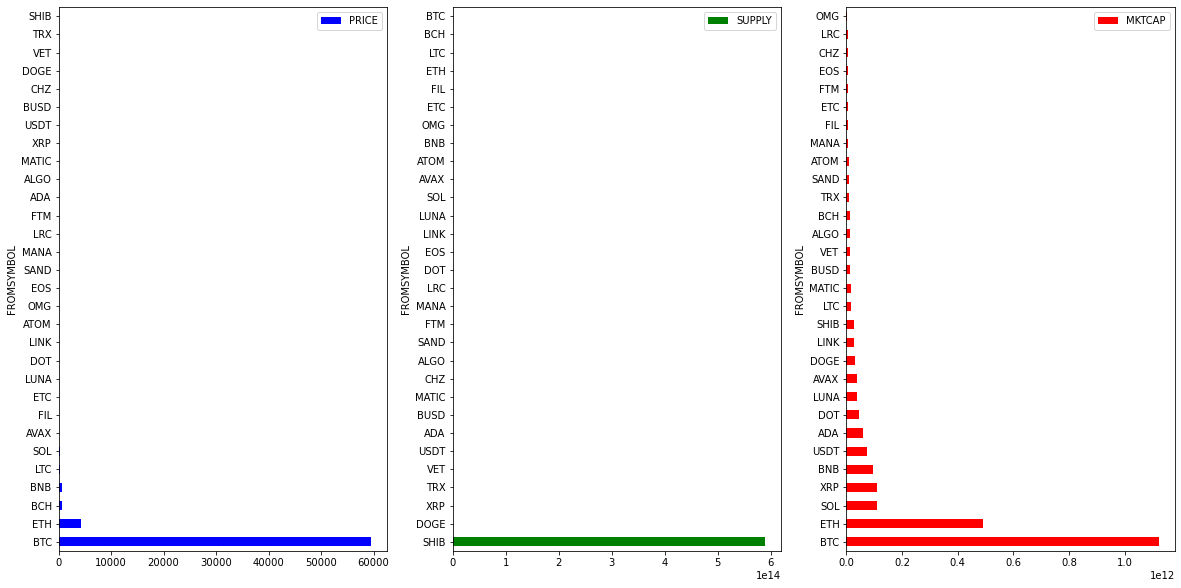

In [99]:
fig, ax = plt.subplots(ncols=3, figsize=(20,10))

df[['PRICE']].sort_values(by = 'PRICE', ascending = False).plot.barh(ax=ax[0], color = 'blue')
df[['SUPPLY']].sort_values(by = 'SUPPLY', ascending = False).plot.barh(ax=ax[1], color = 'green')
df[['MKTCAP']].sort_values(by = 'MKTCAP', ascending = False).plot.barh(ax=ax[2], color = 'red')
plt.show()

There are 3 plots each representing a column name, ‘PRICE’, ‘SUPPLY, and ‘MKTCAP’. ‘MKTCAP’ is a component of ‘PRICE’ x ‘SUPPLY’.<br>It is very clear that Shiba Inu (SHB) has a very huge supply, in fact there is no limit capped to its supply.<br>Bitcoin has the highest market cap as its price is sky high. As shared in the previous section, the recommended approach to take is to look for crypto assets with small market caps and good rating.<br>This may be used in tandem with the list of quality crypto assets in selecting crypto assets to invest in.

We can look at another very similar api to compare if there is any big difference

<font color='green'>Toplist by 24H Top Tier Volume Full Data</font><br> <font color='blue'>- Get a number of top coins by their total top tier volume based on the top 20 markets in the last 24 hours. Default value is first page (0) and the top 10 coins.</font>

In [100]:
url = "https://min-api.cryptocompare.com/data/top/totaltoptiervolfull?limit=30&tsym=USD" # change limit to 30 

result = requests.get(url)

result.status_code # to check if it is a successful get, 200 means ok

200

In [101]:
data = result.json()
data

{'Message': 'Success',
 'Type': 100,
 'MetaData': {'Count': 3270},
 'SponsoredData': [],
 'Data': [{'CoinInfo': {'Id': '1182',
    'Name': 'BTC',
    'FullName': 'Bitcoin',
    'Internal': 'BTC',
    'ImageUrl': '/media/37746251/btc.png',
    'Url': '/coins/btc/overview',
    'Algorithm': 'SHA-256',
    'ProofType': 'PoW',
    'Rating': {'Weiss': {'Rating': 'A-',
      'TechnologyAdoptionRating': 'A-',
      'MarketPerformanceRating': 'A-'}},
    'NetHashesPerSecond': 159125367855125500000,
    'BlockNumber': 710068,
    'BlockTime': 608,
    'BlockReward': 6.25,
    'AssetLaunchDate': '2009-01-03',
    'MaxSupply': 20999999.9769,
    'Type': 1,
    'DocumentType': 'Webpagecoinp'},
   'RAW': {'USD': {'TYPE': '5',
     'MARKET': 'CCCAGG',
     'FROMSYMBOL': 'BTC',
     'TOSYMBOL': 'USD',
     'FLAGS': '2052',
     'PRICE': 59584.2,
     'LASTUPDATE': 1637119862,
     'MEDIAN': 59566.25,
     'LASTVOLUME': 0.45,
     'LASTVOLUMETO': 26829.225000000002,
     'LASTTRADEID': '8673988',
    

In [102]:
data.keys()

dict_keys(['Message', 'Type', 'MetaData', 'SponsoredData', 'Data', 'RateLimit', 'HasWarning'])

In [103]:
data['Data'][0]['RAW']['USD']

{'TYPE': '5',
 'MARKET': 'CCCAGG',
 'FROMSYMBOL': 'BTC',
 'TOSYMBOL': 'USD',
 'FLAGS': '2052',
 'PRICE': 59584.2,
 'LASTUPDATE': 1637119862,
 'MEDIAN': 59566.25,
 'LASTVOLUME': 0.45,
 'LASTVOLUMETO': 26829.225000000002,
 'LASTTRADEID': '8673988',
 'VOLUMEDAY': 7077.775272590092,
 'VOLUMEDAYTO': 421119252.8989408,
 'VOLUME24HOUR': 51150.25492716,
 'VOLUME24HOURTO': 3082589557.132004,
 'OPENDAY': 60109.52,
 'HIGHDAY': 60429.96,
 'LOWDAY': 58620.31,
 'OPEN24HOUR': 60947.07,
 'HIGH24HOUR': 61562.03,
 'LOW24HOUR': 58581.36,
 'LASTMARKET': 'lmax',
 'VOLUMEHOUR': 2231.586816910026,
 'VOLUMEHOURTO': 131770252.59875853,
 'OPENHOUR': 59403.16,
 'HIGHHOUR': 59587.08,
 'LOWHOUR': 58620.31,
 'TOPTIERVOLUME24HOUR': 51150.07704716,
 'TOPTIERVOLUME24HOURTO': 3082578603.9461436,
 'CHANGE24HOUR': -1362.8700000000026,
 'CHANGEPCT24HOUR': -2.236153436088072,
 'CHANGEDAY': -525.3199999999997,
 'CHANGEPCTDAY': -0.8739381049790446,
 'CHANGEHOUR': 181.0399999999936,
 'CHANGEPCTHOUR': 0.3047649316972255,
 'CON

In [104]:
# Data in data['Data'][0]['RAW']['USD'] is of interest
# Need to extract a multi-nested dictionary and append it to an empty list
lst = [] # initiate an empty list to store the 'Rating'

for i in range(len(data['Data'])):
    lst.append(data['Data'][i]['RAW']['USD'])
lst

[{'TYPE': '5',
  'MARKET': 'CCCAGG',
  'FROMSYMBOL': 'BTC',
  'TOSYMBOL': 'USD',
  'FLAGS': '2052',
  'PRICE': 59584.2,
  'LASTUPDATE': 1637119862,
  'MEDIAN': 59566.25,
  'LASTVOLUME': 0.45,
  'LASTVOLUMETO': 26829.225000000002,
  'LASTTRADEID': '8673988',
  'VOLUMEDAY': 7077.775272590092,
  'VOLUMEDAYTO': 421119252.8989408,
  'VOLUME24HOUR': 51150.25492716,
  'VOLUME24HOURTO': 3082589557.132004,
  'OPENDAY': 60109.52,
  'HIGHDAY': 60429.96,
  'LOWDAY': 58620.31,
  'OPEN24HOUR': 60947.07,
  'HIGH24HOUR': 61562.03,
  'LOW24HOUR': 58581.36,
  'LASTMARKET': 'lmax',
  'VOLUMEHOUR': 2231.586816910026,
  'VOLUMEHOURTO': 131770252.59875853,
  'OPENHOUR': 59403.16,
  'HIGHHOUR': 59587.08,
  'LOWHOUR': 58620.31,
  'TOPTIERVOLUME24HOUR': 51150.07704716,
  'TOPTIERVOLUME24HOURTO': 3082578603.9461436,
  'CHANGE24HOUR': -1362.8700000000026,
  'CHANGEPCT24HOUR': -2.236153436088072,
  'CHANGEDAY': -525.3199999999997,
  'CHANGEPCTDAY': -0.8739381049790446,
  'CHANGEHOUR': 181.0399999999936,
  'CHANGE

In [105]:
df = pd.DataFrame(lst)
df

TYPE  MARKET FROMSYMBOL TOSYMBOL FLAGS         PRICE  LASTUPDATE  \
0     5  CCCAGG        BTC      USD  2052  59584.200000  1637119862   
1     5  CCCAGG        ETH      USD  2052   4156.550000  1637119862   
2     5  CCCAGG        BNB      USD  1026    578.040000  1637119860   
3     5  CCCAGG        SOL      USD  2052    216.630000  1637119859   
4     5  CCCAGG       SAND      USD   513      3.370000  1637119858   
5     5  CCCAGG        XRP      USD  2052      1.082000  1637119862   
6     5  CCCAGG        LTC      USD  2049    226.450000  1637119861   
7     5  CCCAGG        DOT      USD  2052     40.070000  1637119856   
8     5  CCCAGG       SHIB      USD  2052      0.000048  1637119857   
9     5  CCCAGG        ADA      USD  2052      1.850000  1637119854   
10    5  CCCAGG       BUSD      USD  2052      1.000000  1637119842   
11    5  CCCAGG        TRX      USD  2052      0.108700  1637119857   
12    5  CCCAGG       AVAX      USD  2052     95.190000  1637119844   
13    5  CCCAGG       USDT      USD  2052      1.000000  1637119854   
14    5  CCCAGG       DOGE      USD   516      0.234800  1637119861   
15    5  CCCAGG       MANA      USD  2052      3.288000  1637119862   
16    5  CCCAGG        FIL      USD  1026     55.410000  1637119825   
17    5  CCCAGG       LINK      USD  2052     28.870000  1637119861   
18    5  CCCAGG        OMG      USD  2052     10.380000  1637119856   
19    5  CCCAGG        LRC      USD  2052      2.786000  1637119858   
20    5  CCCAGG       LUNA      USD   513     42.680000  1637119864   
21    5  CCCAGG        VET      USD   513      0.141400  1637119822   
22    5  CCCAGG        EOS      USD  2052      4.290000  1637119847   
23    5  CCCAGG        BCH      USD  2052    592.010000  1637119854   
24    5  CCCAGG        CHZ      USD  2049      0.483100  1637119858   
25    5  CCCAGG      MATIC      USD  2052      1.532000  1637119863   
26    5  CCCAGG       ALGO      USD  2052      1.681000  1637119860   
27    5  CCCAGG       ATOM      USD  2049     27.770000  1637119847   
28    5  CCCAGG        ETC      USD  2052     50.440000  1637119858   
29    5  CCCAGG        FTM      USD  1026      2.151000  1637119847   

          MEDIAN    LASTVOLUME  LASTVOLUMETO  ...        SUPPLY        MKTCAP  \
0   59566.250000  4.500000e-01  26829.225000  ...  1.887391e+07  1.124587e+12   
1    4162.690000  1.423813e-01    592.833185  ...  1.183508e+08  4.919312e+11   
2     578.000000  3.000000e+00   1734.000000  ...  1.668011e+08  9.641774e+10   
3     216.607500  2.319800e-01     50.293264  ...  5.091953e+08  1.103070e+11   
4       3.370000  1.017000e+03   3427.798500  ...  3.000000e+09  1.011000e+10   
5       1.081000  3.508643e+02    379.635121  ...  9.999015e+10  1.081893e+11   
6     226.520000  8.470000e+00   1921.758300  ...  6.899050e+07  1.562290e+10   
7      40.033000  3.608973e+01   1444.780216  ...  1.132150e+09  4.536523e+10   
8       0.000048  5.200000e+06    249.184000  ...  5.897379e+14  2.826614e+10   
9       1.851000  7.300000e+00     13.521790  ...  3.280780e+10  6.069442e+10   
10      1.000000  5.364000e+01     53.640000  ...  1.290373e+10  1.290373e+10   
11      0.108600  5.600000e+01      6.090000  ...  9.924195e+10  1.078760e+10   
12     95.160000  3.000000e+00    286.773000  ...  3.911284e+08  3.723151e+10   
13      1.000600  9.929017e+01     99.339819  ...  7.465344e+10  7.465344e+10   
14      0.234800  9.570013e+02    224.742189  ...  1.320020e+11  3.099407e+10   
15      3.293000  2.708938e+01     89.538251  ...  2.193999e+09  7.213868e+09   
16     55.420000  1.354030e+02   7502.057376  ...  1.234919e+08  6.842688e+09   
17     28.840000  1.000000e-02      0.289220  ...  1.000000e+09  2.887000e+10   
18     10.370000  1.000000e+01    103.765000  ...  1.402454e+08  1.455747e+09   
19      2.778700  6.000000e+00     16.714800  ...  1.373873e+09  3.827611e+09   
20     42.683000  1.416233e+00     60.449066  ...  9.074447e+08  3.872974e+10   
21      0.141200  3

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TYPE                     30 non-null     object 
 1   MARKET                   30 non-null     object 
 2   FROMSYMBOL               30 non-null     object 
 3   TOSYMBOL                 30 non-null     object 
 4   FLAGS                    30 non-null     object 
 5   PRICE                    30 non-null     float64
 6   LASTUPDATE               30 non-null     int64  
 7   MEDIAN                   30 non-null     float64
 8   LASTVOLUME               30 non-null     float64
 9   LASTVOLUMETO             30 non-null     float64
 10  LASTTRADEID              30 non-null     object 
 11  VOLUMEDAY                30 non-null     float64
 12  VOLUMEDAYTO              30 non-null     float64
 13  VOLUME24HOUR             30 non-null     float64
 14  VOLUME24HOURTO           30 

In [107]:
df.set_index('FROMSYMBOL', inplace = True)

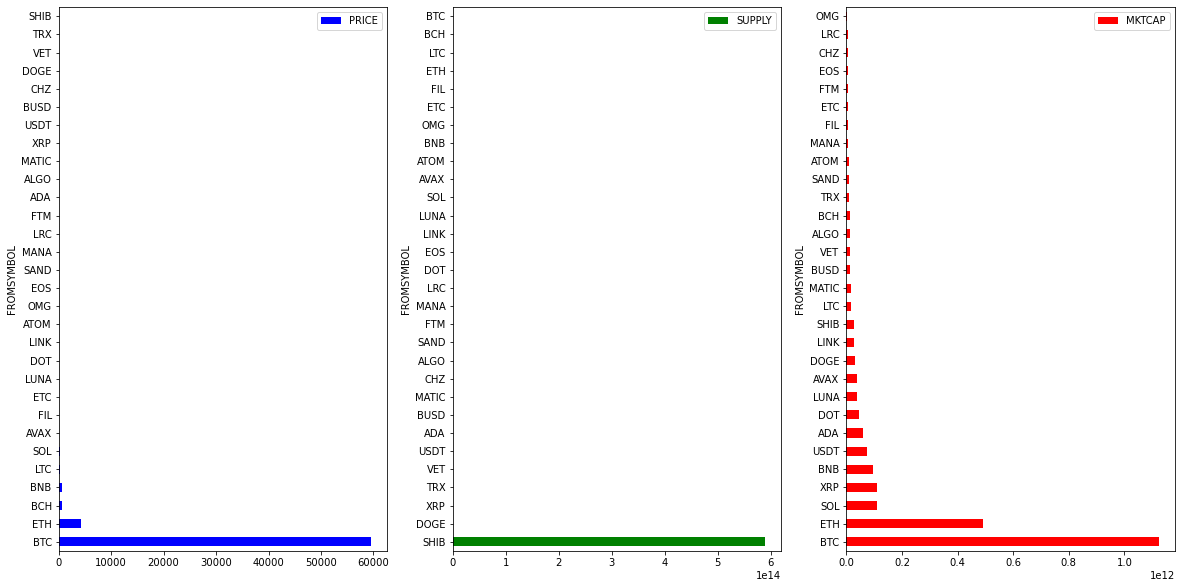

In [108]:
fig, ax = plt.subplots(ncols=3, figsize=(20,10))

df[['PRICE']].sort_values(by = 'PRICE', ascending = False).plot.barh(ax=ax[0], color = 'blue')
df[['SUPPLY']].sort_values(by = 'SUPPLY', ascending = False).plot.barh(ax=ax[1], color = 'green')
df[['MKTCAP']].sort_values(by = 'MKTCAP', ascending = False).plot.barh(ax=ax[2], color = 'red')
plt.show()

The generated output looks very similar to the previous data generated from 'Toplist by 24H Volume Full Data', this is within expectation

<font color='green'>Trading Signals Latest</font><br> <font color='blue'> - Powered by IntoTheBlock, an intelligence company that leverages machine learning and advanced statistics to extract intelligent signals for crypto-assets.</font>

In [109]:
url = "https://min-api.cryptocompare.com/data/tradingsignals/intotheblock/latest?fsym=ETH"

result = requests.get(url)

result.status_code # to check if it is a successful get, 200 means ok

200

In [110]:
data = result.json()
data['Data']

{'id': 7605,
 'time': 1637020800,
 'symbol': 'ETH',
 'partner_symbol': 'ETH',
 'inOutVar': {'category': 'on_chain',
  'sentiment': 'bearish',
  'value': -0.019869696333768894,
  'score': 0.029698399838393265,
  'score_threshold_bearish': 0.25,
  'score_threshold_bullish': 0.75},
 'largetxsVar': {'category': 'on_chain',
  'sentiment': 'bearish',
  'value': -0.0012846828042749742,
  'score': 0,
  'score_threshold_bearish': 0.25,
  'score_threshold_bullish': 0.75},
 'addressesNetGrowth': {'category': 'on_chain',
  'sentiment': 'bearish',
  'value': 0.0048709070879529815,
  'score': 0.23344417772309942,
  'score_threshold_bearish': 0.25,
  'score_threshold_bullish': 0.75},
 'concentrationVar': {'category': 'on_chain',
  'sentiment': 'bullish',
  'value': 0.0024769675799022014,
  'score': 0.8115403158292583,
  'score_threshold_bearish': 0.25,
  'score_threshold_bullish': 0.75}}

In [111]:
data.keys()

dict_keys(['Response', 'Message', 'HasWarning', 'Type', 'RateLimit', 'Data'])

In [112]:
data['Data']

{'id': 7605,
 'time': 1637020800,
 'symbol': 'ETH',
 'partner_symbol': 'ETH',
 'inOutVar': {'category': 'on_chain',
  'sentiment': 'bearish',
  'value': -0.019869696333768894,
  'score': 0.029698399838393265,
  'score_threshold_bearish': 0.25,
  'score_threshold_bullish': 0.75},
 'largetxsVar': {'category': 'on_chain',
  'sentiment': 'bearish',
  'value': -0.0012846828042749742,
  'score': 0,
  'score_threshold_bearish': 0.25,
  'score_threshold_bullish': 0.75},
 'addressesNetGrowth': {'category': 'on_chain',
  'sentiment': 'bearish',
  'value': 0.0048709070879529815,
  'score': 0.23344417772309942,
  'score_threshold_bearish': 0.25,
  'score_threshold_bullish': 0.75},
 'concentrationVar': {'category': 'on_chain',
  'sentiment': 'bullish',
  'value': 0.0024769675799022014,
  'score': 0.8115403158292583,
  'score_threshold_bearish': 0.25,
  'score_threshold_bullish': 0.75}}

In [113]:
data['Data'].keys()

dict_keys(['id', 'time', 'symbol', 'partner_symbol', 'inOutVar', 'largetxsVar', 'addressesNetGrowth', 'concentrationVar'])

Not too sure how to leverage this, data is also not available for a few cryptocurrencies that I tried to search. Perhaps something to look into at a later stage

<font color='green'>Historical Day Social Stats Data</font><br><font color='blue'> - You can only use this endpoint with a valid api_key. Returns daily social stats data for the coin requested</font>

In [114]:
apiKey = "<apikey>"

url = "https://min-api.cryptocompare.com/data/social/coin/histo/day?coinId=4591"

headers = {
    "authorization": "Apikey " + apiKey
}

result = requests.get(url, headers=headers)

result.status_code # to check if it is a successful get, 200 means ok

200

In [115]:
data = result.json()
data

{'Response': 'Success',
 'Message': '',
 'HasWarning': False,
 'Type': 100,
 'RateLimit': {},
 'Data': [{'time': 1634515200,
   'comments': 0,
   'posts': 0,
   'followers': 8,
   'points': 200,
   'overview_page_views': 621,
   'analysis_page_views': 219,
   'markets_page_views': 24,
   'charts_page_views': 42,
   'trades_page_views': 56,
   'forum_page_views': 49,
   'influence_page_views': 20,
   'total_page_views': 1031,
   'fb_likes': 0,
   'fb_talking_about': 0,
   'twitter_followers': 0,
   'twitter_following': 0,
   'twitter_lists': 0,
   'twitter_favourites': 0,
   'twitter_statuses': 0,
   'reddit_subscribers': 0,
   'reddit_active_users': 0,
   'reddit_posts_per_hour': 0,
   'reddit_posts_per_day': 0,
   'reddit_comments_per_hour': 0,
   'reddit_comments_per_day': 0,
   'code_repo_stars': 0,
   'code_repo_forks': 0,
   'code_repo_subscribers': 0,
   'code_repo_open_pull_issues': 0,
   'code_repo_closed_pull_issues': 0,
   'code_repo_open_issues': 0,
   'code_repo_closed_issu

In [116]:
data.keys()

dict_keys(['Response', 'Message', 'HasWarning', 'Type', 'RateLimit', 'Data'])

In [117]:
data['Data']

[{'time': 1634515200,
  'comments': 0,
  'posts': 0,
  'followers': 8,
  'points': 200,
  'overview_page_views': 621,
  'analysis_page_views': 219,
  'markets_page_views': 24,
  'charts_page_views': 42,
  'trades_page_views': 56,
  'forum_page_views': 49,
  'influence_page_views': 20,
  'total_page_views': 1031,
  'fb_likes': 0,
  'fb_talking_about': 0,
  'twitter_followers': 0,
  'twitter_following': 0,
  'twitter_lists': 0,
  'twitter_favourites': 0,
  'twitter_statuses': 0,
  'reddit_subscribers': 0,
  'reddit_active_users': 0,
  'reddit_posts_per_hour': 0,
  'reddit_posts_per_day': 0,
  'reddit_comments_per_hour': 0,
  'reddit_comments_per_day': 0,
  'code_repo_stars': 0,
  'code_repo_forks': 0,
  'code_repo_subscribers': 0,
  'code_repo_open_pull_issues': 0,
  'code_repo_closed_pull_issues': 0,
  'code_repo_open_issues': 0,
  'code_repo_closed_issues': 0,
  'code_repo_contributors': 0},
 {'time': 1634601600,
  'comments': 0,
  'posts': 0,
  'followers': 8,
  'points': 200,
  'over

In [118]:
df = pd.DataFrame(data['Data'])
df

time  comments  posts  followers  points  overview_page_views  \
0   1634515200         0      0          8     200                  621   
1   1634601600         0      0          8     200                  621   
2   1634688000         0      0          8     200                  621   
3   1634774400         0      0          8     200                  621   
4   1634860800         0      0          8     200                  621   
5   1634947200         0      0          8     200                  621   
6   1635033600         0      0          8     200                  621   
7   1635120000         0      0          8     200                  621   
8   1635206400         0      0          8     200                  621   
9   1635292800         0      0          8     200                  621   
10  1635379200         0      0          8     200                  621   
11  1635465600         0      0          8     200                  621   
12  1635552000         0      0          8     200                  621   
13  1635638400         0      0          8     200                  621   
14  1635724800         0      0          8     200                  621   
15  1635811200         0      0          8     200                  621   
16  1635897600         0      0          8     200                  621   
17  1635984000         0      0          8     200                  621   
18  1636070400         0      0          8     200                  621   
19  1636156800         0      0          8     200                  621   
20  1636243200         0      0          8     200                  621   
21  1636329600         0      0          8     200                  621   
22  1636416000         0      0          8     200                  621   
23  1636502400         0      0          8     200                  621   
24  1636588800         0      0          8     200                  621   
25  1636675200         0      0          8     200                  622   
26  1636761600         0      0          8     200                  622   
27  1636848000         0      0          8     200                  622   
28  1636934400         0      0          8     200                  622   
29  1637020800         0      0          8     200                  622   
30  1637107200         0      0          8     200                  622   

    analysis_page_views  markets_page_views  charts_page_views  \
0                   219                  24                 42   
1                   219                  24                 42   
2                   219                  24                 42   
3                   219                  24                 42   
4                   219                  24                 42   
5                   219                  24                 42   
6                   219                  24                 42   
7                   219                  24                 42   
8                   219                  24                 42   
9                   219                  24                 42   
10                  219                  24                 42   
11                  219                  24                 42   
12                  219                  24                 42   
13                  219                  24                 42   
14                  219                  24                 42   
15                  219                  24                 42   
16                  219                  24                 42   
17                  219                  24                 42   
18                  219                  24                 42   
19                  219                  24                 42   
20                  219                  24                 42   
21                  219                  24                 42   
22                  219                  24                 42   
23                  219  

This api requires crypto asset id and it is to gather social network stats data of particular crypto asset of interest. Data does not seem to be updated

<font color='green'>Latest News Articles</font><br> <font color='blue'> - Returns news articles from the providers that CryptoCompare has integrated with.</font>

In [119]:
url = "https://min-api.cryptocompare.com/data/v2/news/?lang=EN"

result = requests.get(url)

result.status_code # to check if it is a successful get, 200 means ok

200

In [120]:
data = result.json()
data

{'Type': 100,
 'Message': 'News list successfully returned',
 'Promoted': [],
 'Data': [{'id': '27363052',
   'guid': 'https://www.newsbtc.com/?p=476555',
   'published_on': 1637118508,
   'imageurl': 'https://images.cryptocompare.com/news/default/newsbtc.png',
   'title': 'Bitcoin Turns Red, Why Bears Aim A Retest of $55K',
   'url': 'https://www.newsbtc.com/analysis/btc/bitcoin-turns-red-55k/',
   'source': 'newsbtc',
   'body': 'Bitcoin price extended decline below the $60k support against the US Dollar. BTC could extend losses towards $55k in the coming sessions. Bitcoin started a fresh decline below the $65k and $62k support levels. The price is now trading below $60,000 and the 100 hourly simple moving average. There is a key bearish trend line forming with resistance near $61,000 on the hourly chart of the BTC/USD pair (data feed from Kraken). The pair could extend losses below the $58,500 and $57,500 support levels in the near term. Bitcoin Price Gains Bearish Momentum Bitcoin 

In [121]:
data.keys()

dict_keys(['Type', 'Message', 'Promoted', 'Data', 'RateLimit', 'HasWarning'])

In [122]:
df = pd.DataFrame(data['Data'])
df

id                                               guid  published_on  \
0   27363052                  https://www.newsbtc.com/?p=476555    1637118508   
1   27363051               https://cryptobriefing.com/?p=102211    1637116334   
2   27363050  https://news.bitcoin.com/?p=495333&preview=tru...    1637116248   
3   27363048                       https://nulltx.com/?p=102034    1637115689   
4   27363049  https://www.cryptoglobe.com/latest/2021/11/cry...    1637115600   
5   27363047  https://bitcoinmagazine.com/culture/bitcoin-ma...    1637114400   
6   27363046                       https://nulltx.com/?p=102031    1637114032   
7   27363045  https://cointelegraph.com/news/vaneck-bitcoin-...    1637112408   
8   27363044  https://www.cryptoglobe.com/latest/2021/11/cry...    1637112000   
9   27363041                       https://nulltx.com/?p=102027    1637111615   
10  27363042                        https://decrypt.co/?p=86251    1637111351   
11  27363040  https://cointelegraph.com/news/miramax-sues-ta...    1637111300   
12  27363038  https://bitcoinmagazine.com/markets/bitcoin-mi...    1637110800   
13  27363035                    https://ambcrypto.com/?p=200031    1637109057   
14  27363034  https://news.bitcoin.com/?p=495328&preview=tru...    1637109024   
15  27363033               https://cryptobriefing.com/?p=102166    1637108716   
16  27363032  https://www.cryptoglobe.com/latest/2021/11/shi...    1637108400   
17  27363031               https://cryptobriefing.com/?p=102173    1637107306   
18  27363030  https://bitcoinmagazine.com/business/instituti...    1637107200   
19  27363029                 https://cryptopotato.com/?p=151783    1637106061   
20  27363024                    https://ambcrypto.com/?p=200347    1637105406   
21  27363023  https://www.cryptoglobe.com/latest/2021/11/xrp...    1637104800   
22  27362995  https://seekingalpha.com/article/4470095-grays...    1637104640   
23  27362994  https://cointelegraph.com/news/traders-watch-f...    1637104500   
24  27363026                    https://dailyhodl.com/?p=174452    1637103935   
25  27363027                    https://dailyhodl.com/?p=174757    1637103714   
26  27362992                  https://www.newsbtc.com/?p=476475    1637103645   
27  27362991                   https://bitcoinist.com/?p=164226    1637103637   
28  27363039  https://cryptonews.com/news/in-person-tether-s...    1637103600   
29  27362989                     https://blockworks.co/?p=11253    1637102644   
30  27362988                      https://coingape.com/?p=93849    1637102583   
31  27362986                        https://decrypt.co/?p=86244    1637102006   
32  27362984                    https://ambcrypto.com/?p=200381    1637101853   
33  27362983  https://news.bitcoin.com/?p=495346&preview=tru...    1637101851   
34  27362982                    https://coinpedia.org/?p=111904    1637101680   
35  27362981                     https://blockworks.co/?p=11299    1637101170   
36  27362978  https://cointelegraph.com/news/nydig-partners-...    1637100600   
37  27362974           https://www.livebitcoinnews.com/?p=67723    1637100051   
38  27362975  https://news.bitcoin.com/?p=495198&preview=tru...    1637100029   
39  27362976                        https://decrypt.co/?p=86239    1637099896   
40  27362973  https://cointelegraph.com/news/mt-gox-rehabili...    1637099700   
41  27362971         https://www.theblockcrypto.com/post/119720    1637099423   
42  27362969       https://www.theblockcrypto.com/linked/124558    1637099325   
43  27362970  https://cointelegraph.com/news/polygon-launche...    1637099100   
44  27362966                 https://cryptopotato.com/?p=151865    1637098373   
45  27362965         https://www.theblockcrypto.com/post/124547    1637098060   
46  27362951  https://seekingalpha.com/article/4470065-intro...    1637097960   
47  27362949  https://cointelegraph.com/news/iotex-machinefi...    1637097300   
48  27362948               https://crypto

This is useful to find updated news on crypto assets, an easy way is to save it as an excel file and click on the urls that are of interest

<font color='green'>List News Feeds and Categories</font><br><font color='blue'> - Returns all the news feeds (providers) that CryptoCompare has integrated with and the full list of categories.</font>

In [123]:
url = "https://min-api.cryptocompare.com/data/news/feedsandcategories"

result = requests.get(url)

result.status_code # to check if it is a successful get, 200 means ok

200

In [124]:
data = result.json()
data

{'Response': 'Success',
 'Message': '',
 'HasWarning': False,
 'Type': 100,
 'RateLimit': {},
 'Data': {'Categories': [{'categoryName': 'BTC',
    'wordsAssociatedWithCategory': ['BTC', 'BITCOIN', 'SATOSHI'],
    'excludedPhrases': ['BITCOIN CASH']},
   {'categoryName': 'BCH',
    'wordsAssociatedWithCategory': ['BCH', 'BITCOINCASH'],
    'includedPhrases': ['BITCOIN CASH']},
   {'categoryName': 'ETH',
    'wordsAssociatedWithCategory': ['ETH',
     'ETHEREUM',
     'VITALIK',
     'FOUNDATION'],
    'excludedPhrases': ['ETHEREUM CLASSIC']},
   {'categoryName': 'LTC', 'wordsAssociatedWithCategory': ['LTC', 'LITECOIN']},
   {'categoryName': 'XMR', 'wordsAssociatedWithCategory': ['XMR', 'MONERO']},
   {'categoryName': 'ZEC', 'wordsAssociatedWithCategory': ['ZEC', 'ZCASH']},
   {'categoryName': 'ETC',
    'wordsAssociatedWithCategory': ['ETC', 'ETHEREUMCLASSIC'],
    'includedPhrases': ['ETHEREUM CLASSIC']},
   {'categoryName': 'XRP', 'wordsAssociatedWithCategory': ['XRP', 'RIPPLE']},
   

In [125]:
data.keys()

dict_keys(['Response', 'Message', 'HasWarning', 'Type', 'RateLimit', 'Data'])

In [126]:
data['Data'].keys()

dict_keys(['Categories', 'Feeds'])

In [127]:
df_cat = pd.DataFrame(data['Data']['Categories'])
df_cat

categoryName                        wordsAssociatedWithCategory  \
0           BTC                            [BTC, BITCOIN, SATOSHI]   
1           BCH                                 [BCH, BITCOINCASH]   
2           ETH               [ETH, ETHEREUM, VITALIK, FOUNDATION]   
3           LTC                                    [LTC, LITECOIN]   
4           XMR                                      [XMR, MONERO]   
5           ZEC                                       [ZEC, ZCASH]   
6           ETC                             [ETC, ETHEREUMCLASSIC]   
7           XRP                                      [XRP, RIPPLE]   
8           TRX                                      [TRX, TRONIX]   
9           ADA                                     [ADA, CARDANO]   
10         DASH                                [DASH, DIGITALCASH]   
11          XTZ                                       [XTZ, TEZOZ]   
12         USDT                                     [USDT, TETHER]   
13       Mining         [MINING, HASHRATE, HASHING, POOLS, REWARD]   
14     Exchange            [EXCHANGE, BITFINEX, POLONIEX, BINANCE]   
15       Market         [MARKET, MARKETS, ANALYSIS, INDEX, PRICES]   
16         Asia  [ASIA, CHINA, KOREA, JAPAN, HONG, SINGAPORE, T...   
17          ICO  [ICOS, ICO, OFFERING, TOKEN, TOKENS, RAISE, RA...   
18   Regulation  [REGULATION, LEGAL, LAW, TAX, TAXES, SENATE, L...   
19   Blockchain                    [BLOCKCHAIN, PROTOCOL, SCALING]   
20      Trading  [TECHNICAL, TRADING, FUNDAMENTALS, PRICE, BULL...   
21   Technology                       [SOFTWARE, TECHNOLOGY, TECH]   
22       Wallet  [LEDGER, TREZOR, KEEPKEY, COINOMI, JAXX, MYETH...   
23      Altcoin                                [ALTCOIN, ALTCOINS]   
24         Fiat  [FIAT, RESERVE, GOLD, GOLD-BACKED, BANK, DOLLA...   
25     Business  [BUSINESS, INVESTOR, INVESTORS, REVENUE, PROFI...   
26    Commodity                     [COMMODITIES, OIL, OIL-BACKED]   
27    Sponsored  [SPONSORED, FEATURED, PRESS RELEASE, PRESS REL...   

       excludedPhrases     includedPhrases  
0       [BITCOIN CASH]                 NaN  
1                  NaN      [BITCOIN CASH]  
2   [ETHEREUM CLASSIC]                 NaN  
3                  NaN                 NaN  
4                  NaN                 NaN  
5                  NaN                 NaN  
6                  NaN  [ETHEREUM CLASSIC]  
7                  NaN                 NaN  
8                  NaN                 NaN  
9                  NaN                 NaN  
10                 NaN                 NaN  
11                 NaN                 NaN  
12                 NaN                 NaN  
13                 NaN                 NaN  
14                 NaN                 NaN  
15                 NaN                 NaN  
16                 NaN                 NaN  
17                 NaN                 NaN  
18                 NaN                 NaN  
19                 NaN                 NaN  
20                 NaN                 NaN  
21                 NaN                 NaN  
22                 NaN                 NaN  
23                 NaN                 NaN  
24                 NaN                 NaN  
25                 NaN                 NaN  
26                 NaN                 NaN  
27                 NaN                 NaN

This is useful for googling keywords related to the category of interest

In [128]:
df_feed = pd.DataFrame(data['Data']['Feeds'])
df_feed

key                   name lang  \
0         cryptocompare          CryptoCompare   EN   
1           cryptoglobe            CryptoGlobe   EN   
2              theblock               TheBlock   EN   
3      cryptonewsreview       CryptoNewsReview   EN   
4              coindesk               CoinDesk   EN   
5       bitcoinmagazine       Bitcoin Magazine   EN   
6             coinquora              CoinQuora   EN   
7          yahoofinance  Yahoo Finance Bitcoin   EN   
8                   ccn                    CCN   EN   
9       financemagnates       Finance Magnates   EN   
10           espaciobit             EspacioBit   ES   
11           99bitcoins             99bitcoins   EN   
12           bitcoinist             Bitcoinist   EN   
13          bitcoin.com            Bitcoin.com   EN   
14          ethnews.com            ETHNews.com   EN   
15        cointelegraph          CoinTelegraph   EN   
16     cointelegraph_es          CoinTelegraph   ES   
17           cryptovest             CryptoVest   EN   
18        cryptoinsider          CryptoInsider   EN   
19      livebitcoinnews      Live Bitcoin News   EN   
20              newsbtc                NewsBTC   EN   
21          coinspeaker            CoinSpeaker   EN   
22            coinjoker              CoinJoker   EN   
23           trustnodes             TrustNodes   EN   
24            themerkle                 NullTx   EN   
25      cryptocoremedia       Crypto CoreMedia   EN   
26         cryptopotato          Crypto Potato   EN   
27           coinnounce             Coinnounce   EN   
28                blokt                  Blokt   EN   
29       cointelligence         Cointelligence   EN   
30    ethereumworldnews    Ethereum World News   EN   
31            ambcrypto             AMB Crypto   EN   
32         ambcrypto_es             AMB Crypto   ES   
33       cryptobriefing        Crypto Briefing   EN   
34          cryptoslate            CryptoSlate   EN   
35             coingape               CoinGape   EN   
36            dailyhodl         The Daily Hodl   EN   
37           bitcoinerx             Bitcoinerx   EN   
38              chaindd                Chaindd   EN   
39          cryptonewsz            CryptoNewsZ   EN   
40       criptonoticias         CriptoNoticias   ES   
41        diariobitcoin          DiarioBitcoin   ES   
42        cryptopolitan          Cryptopolitan   EN   
43              decrypt                Decrypt   EN   
44           chaintimes             Chaintimes   EN   
45            timesnext              TimesNext   EN   
46  crypto_watch_com_br           Crypto Watch   PT   
47          weisscrypto   Weiss Crypto Ratings   EN   
48       cryptocoinnews        CryptoCoin.News   EN   
49         seekingalpha          Seeking Alpha   EN   
50             zycrypto               ZyCrypto   EN   
51           cryptonews             cryptonews   EN   
52            coinpedia              coinpedia   EN   
53         okexinsights          OKEx Insights   EN   
54           blockworks             Blockworks   EN   
55         coinrepublic      The Coin Republic   EN   

                                                  img  
0   https://images.cryptocompare.com/news/default/...  
1   https://images.cryptocompare.com/news/default/...  
2   https://images.cryptocompare.com/news/default/...  
3   https://images.cryptocompare.com/news/default/...  
4   https://images.cryptocompare.com/news/default/...  
5   https://images.cryptocompare.com/news/default/...  
6   https://images.cryptocompare.com/news/default/...  
7   https://images.cryptocompare.com/news/default/...  
8   https://images.cryptocompare.com/news/default/...  
9   https://images.cryptocompare.com/news/default/...  
10  https://images.cryptocompare.com/news/default/...  
11  https://images.cryptocompare.com/news/default/...  
12  https://images.cryptocompare.com/news/default/...  
13  https://images.cryptocompare.com/news/default/...  
14  https://images.cryptocompare.com/news/de

This may not be of any use

This concludes my EDA journey on crypto assets for this project dataed Nov 17th 2021